In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Final Data Processing.

In [2]:
df = pd.read_csv('final_data.csv') #iterations = 3, nbit = 1024

In [3]:
df

,name,molweight,critical temperature (K),acentric factor,boiling point (K),SMILES,ECFP_Bits
0,(+)-camphene,136.23704,638.00,0.2960,432.65,CC1(C)C2CCC(C2)C1=C,0000000000000000000000000000000001011000000000...
1,(-)-a-pinene,136.23704,647.00,0.3410,429.35,CC1=CC[C@H]2C[C@@H]1C2(C)C,0000000000000000000000000000000001001000000000...
2,(-)-camphene,136.23704,638.00,0.2960,439.95,CC1(C)C2CCC(C2)C1=C,0000000000000000000000000000000001011000000000...
3,"(1,1-dimethylbutyl)benzene",162.27492,697.15,0.4370,478.65,CCCC(C)(C)c1ccccc1,0000000000000000000000000000001001000000000000...
4,(1-butylhexadecyl)benzene,358.65124,851.65,0.7590,693.15,CCCCCCCCCCCCCCCC(CCCC)c1ccccc1,0100000000000000000000000000000001000000000000...
...,...,...,...,...,...,...,...
5895,vinylacetylene,52.07576,454.00,0.1180,278.25,C/C=C/C=C,0000000000000000000000000000000001000000000000...
5896,vinylcyclohexene,108.18328,599.00,0.3290,401.00,CC(C)/C=C/Cl,0100000000000000000000000000000001000000000000...
5897,water,18.01528,647.13,0.3449,373.15,C/C=C/CF,0000000000000000000000000000000001000000000000...
5898,zirconium chloride,233.03480,778.00,0.2980,604.15,C\C(c1ccccc1)=C(\C)c2ccccc2,0000000000000000000000000000000001000000000000...


In [4]:
df.describe()

,molweight,critical temperature (K),acentric factor,boiling point (K)
count,5900.000000,5900.000000,5900.000000,5900.000000
mean,162.792075,650.688900,0.489841,460.435158
std,75.747231,109.978203,0.205024,95.686479
min,16.042760,126.200000,0.010500,77.340000
25%,114.230920,587.155000,0.332000,400.990000
50%,148.181780,639.915000,0.447000,456.150000
75%,182.349440,720.627500,0.645250,513.150000
max,626.327880,1314.000000,1.116000,797.080000


#### Get distribution of the different properties

array([[<AxesSubplot:title={'center':'molweight'}>,
        <AxesSubplot:title={'center':'critical temperature (K)'}>],
       [<AxesSubplot:title={'center':'acentric factor'}>,
        <AxesSubplot:title={'center':'boiling point (K)'}>]], dtype=object)

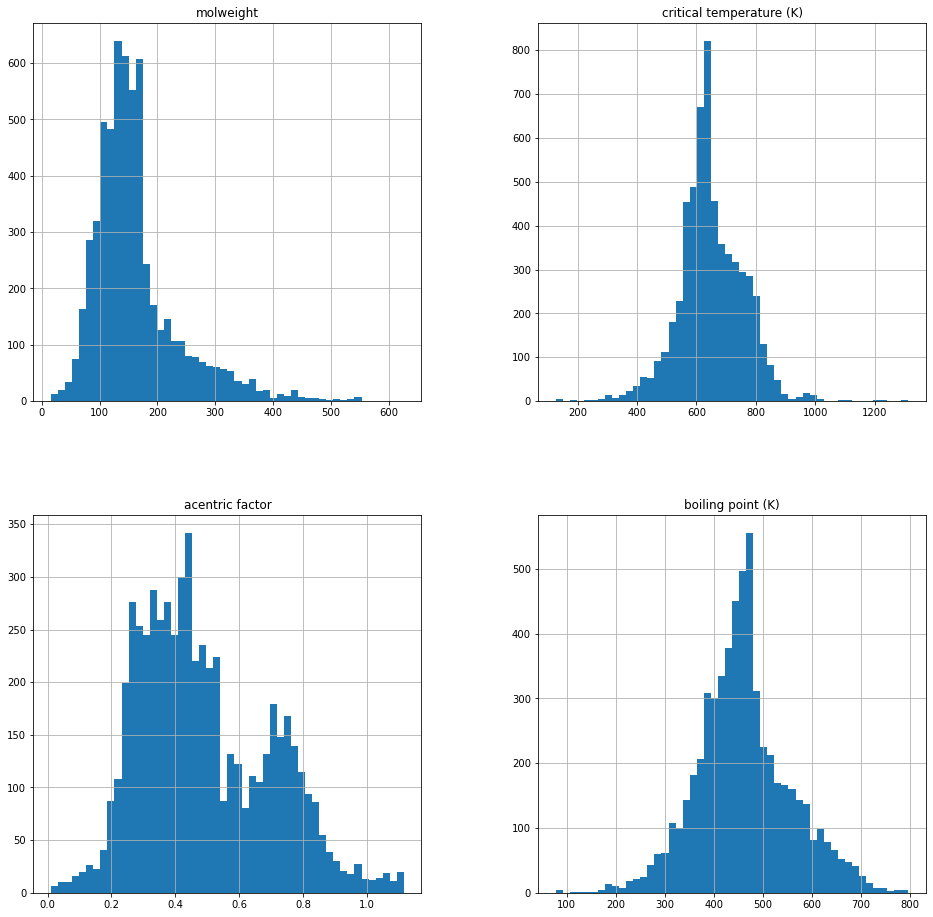

In [5]:
df[['molweight','critical temperature (K)','acentric factor','boiling point (K)']].hist(layout=(2,2),figsize=(16,16),bins=50)

In [6]:
df['ECFP_Bits'].apply(lambda x: len(x)).unique() #Verfiying all bit lengths

array([1024], dtype=int64)

In [7]:
ECFP = df['ECFP_Bits'].str.split('',expand=True)

In [8]:
ECFP.head()

,0,1,2,3,4,5,6,7,8,9,...,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025
0,,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,
1,,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,
2,,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,
3,,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,
4,,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,


In [9]:
ECFP.drop(columns=[0,1025],inplace=True)

In [10]:
ECFP.head()

,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


The ECFP dataframe can now be seen as Input X.

### Make dataset with molecular weight

In [11]:
ECFP_mol_weight = ECFP.copy(deep=True)
ECFP_mol_weight.insert(0,'MW',df['molweight'])

In [12]:
ECFP_mol_weight.head()

,MW,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,136.23704,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,136.23704,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,136.23704,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,162.27492,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,358.65124,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


#### Normalise Molecular Weight data (using MinMaxScaler())

In [13]:
ECFP_mol_weight['MW'] = (ECFP_mol_weight['MW']-ECFP_mol_weight['MW'].min())/(ECFP_mol_weight['MW'].max()-ECFP_mol_weight['MW'].min())

In [14]:
ECFP_mol_weight.head()

,MW,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0.196948,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.196948,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.196948,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.239613,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.561391,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


## 2. Example 1: Using an ANN as a multi-output regression model. Using just ECFP

#### Neural Network Structure Used:
<br>**4 layer network** with dimensions: [512,256,64,3]
<br>**Activation Functions**: All Relu as an intial trial
<br>**Loss Function**: Mean Squared Error
<br>**Optimiser**: Adam
<br>**Epochs**: 150

In [15]:
#pip install -U scikit-learn

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
y_cols = ['critical temperature (K)','acentric factor','boiling point (K)']

In [18]:
X = ECFP.astype(float); y= df[y_cols].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

I will try a 4 layer network, with hidden units: [512, 256, 64, 3] --> this is given in parameter "layer_dims"

In [19]:
model = Sequential()
model.add(Dense(512,input_shape=(1024,),activation='relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3,activation='relu'))

In [20]:
model.compile(loss='mse',optimizer='adam')

In [21]:
X_train.dtypes

1       float64
2       float64
3       float64
4       float64
5       float64
         ...   
1020    float64
1021    float64
1022    float64
1023    float64
1024    float64
Length: 1024, dtype: object

In [22]:
model.fit(X_train,y_train,epochs = 150)

Epoch 1/150
148/148 [==============================] - 1s 2ms/step - loss: 60633.7812
Epoch 2/150
148/148 [==============================] - 0s 2ms/step - loss: 12143.9893A: 0s - loss: 12862
Epoch 3/150
148/148 [==============================] - 0s 2ms/step - loss: 8898.3428
Epoch 4/150
148/148 [==============================] - 0s 2ms/step - loss: 7154.9150
Epoch 5/150
148/148 [==============================] - 0s 2ms/step - loss: 6177.8818
Epoch 6/150
148/148 [==============================] - 0s 2ms/step - loss: 5552.7446
Epoch 7/150
148/148 [==============================] - 0s 2ms/step - loss: 5077.3745
Epoch 8/150
148/148 [==============================] - 0s 2ms/step - loss: 4767.5796
Epoch 9/150
148/148 [==============================] - 0s 2ms/step - loss: 4435.7920
Epoch 10/150
148/148 [==============================] - 0s 2ms/step - loss: 4165.6719
Epoch 11/150
148/148 [==============================] - 0s 2ms/step - loss: 3956.1272
Epoch 12/150
148/148 [====================

148/148 [==============================] - 0s 2ms/step - loss: 1802.2142
Epoch 97/150
148/148 [==============================] - 0s 2ms/step - loss: 1845.9451
Epoch 98/150
148/148 [==============================] - 0s 2ms/step - loss: 1841.9064
Epoch 99/150
148/148 [==============================] - 0s 2ms/step - loss: 1787.8280
Epoch 100/150
148/148 [==============================] - 0s 2ms/step - loss: 1799.0225
Epoch 101/150
148/148 [==============================] - 0s 2ms/step - loss: 1802.0890
Epoch 102/150
148/148 [==============================] - 0s 2ms/step - loss: 1777.0573
Epoch 103/150
148/148 [==============================] - 0s 2ms/step - loss: 1818.7261
Epoch 104/150
148/148 [==============================] - 0s 2ms/step - loss: 1790.2360
Epoch 105/150
148/148 [==============================] - 0s 2ms/step - loss: 1806.1489
Epoch 106/150
148/148 [==============================] - 0s 2ms/step - loss: 1817.0981
Epoch 107/150
148/148 [==============================] - 0s 

Terrible.. 1700+ Loss = MSE

In [23]:
model.evaluate(X_test,y_test)

37/37 [==============================] - 0s 914us/step - loss: 9625.0547


9625.0546875

#### Evaluate Model for example 1 with K-fold cross validation

In [26]:
#THIS LINE TAKES A WHILE TO RUN!
"""
from sklearn.model_selection import RepeatedKFold

def get_model_example1():
    model = Sequential()
    
    model.add(Dense(512,input_shape=(1024,),activation='relu'))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3,activation='relu'))
    
    model.compile(loss='mse',optimizer='adam')
    return model

def evaluate_model(X,y):
    results=list()
    n_inputs, n_outputs = X.shape[1], y.shape[1]
    cv = RepeatedKFold(n_splits=10, n_repeats=3)
    
    for train_ix, test_ix in cv.split(X):
		# prepare data
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
        #Get and fit Model 
        model=get_model_example1()
        model.fit(X_train,y_train,epochs = 150)
        mae = model.evaluate(X_test,y_test,verbose = 0)
        print(mse)
        results.append(mse)
    return results

results = evaluate_model(X,y)
"""

"\nfrom sklearn.model_selection import RepeatedKFold\n\ndef get_model_example1():\n    model = Sequential()\n    \n    model.add(Dense(512,input_shape=(1024,),activation='relu'))\n    model.add(Dense(256, activation = 'relu'))\n    model.add(Dense(64, activation='relu'))\n    model.add(Dense(3,activation='relu'))\n    \n    model.compile(loss='mse',optimizer='adam')\n    return model\n\ndef evaluate_model(X,y):\n    results=list()\n    n_inputs, n_outputs = X.shape[1], y.shape[1]\n    cv = RepeatedKFold(n_splits=10, n_repeats=3)\n    \n    for train_ix, test_ix in cv.split(X):\n\t\t# prepare data\n        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]\n        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]\n        #Get and fit Model \n        model=get_model_example1()\n        model.fit(X_train,y_train,epochs = 150)\n        mae = model.evaluate(X_test,y_test,verbose = 0)\n        print(mse)\n        results.append(mse)\n    return results\n\nresults = evaluate_model(X,y)\n

#### Evaluating Model using Percentage Error

In [27]:
predictions = model.predict(X_test)

In [28]:
predictions[:5]

array([[574.8843 ,   0.     , 415.41864],
       [550.6928 ,   0.     , 363.37274],
       [818.3461 ,   0.     , 633.451  ],
       [559.632  ,   0.     , 379.44324],
       [697.36224,   0.     , 453.07492]], dtype=float32)

In [29]:
predictions_df = pd.DataFrame(predictions,columns=y_cols)

In [30]:
predictions_df

,critical temperature (K),acentric factor,boiling point (K)
0,574.884277,0.0,415.418640
1,550.692810,0.0,363.372742
2,818.346130,0.0,633.450989
3,559.632019,0.0,379.443237
4,697.362244,0.0,453.074921
...,...,...,...
1175,666.229370,0.0,478.715332
1176,535.944763,0.0,342.499695
1177,556.057556,0.0,391.751831
1178,614.114929,0.0,410.929810


In [31]:
predictions_df.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.000000,1180.0,1180.000000
mean,635.873169,0.0,444.690674
std,88.486336,0.0,74.228752
min,301.678711,0.0,190.169800
25%,579.985138,0.0,397.387146
50%,632.733856,0.0,440.171371
75%,686.964539,0.0,485.207245
max,989.767761,0.0,759.133606


In [32]:
y_test.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.00000,1180.000000,1180.000000
mean,648.90372,0.489062,459.566042
std,109.17618,0.204687,96.392358
min,126.20000,0.037700,77.340000
25%,586.37250,0.332000,402.102500
50%,638.91000,0.438500,453.150000
75%,716.00750,0.650000,510.000000
max,1179.00000,1.116000,783.000000


It looks like predictions for Critical Temperature and boiling point are somewhat okay (possibly after experimenting with hyperparameters, the performance of the ANN might be better). But the model is useless at predicting acentric factor (it is guessing every value as 0).

Multi-ouput ANN is not effective. Deal with them 1 by 1.

Now for Critical Temperature & Boiling point, calculate %errors

In [33]:
perc_errors = np.abs((y_test-predictions)/y_test)*100

In [34]:
perc_errors.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.000000,1180.0,1180.000000
mean,16.028248,100.0,20.025037
std,20.418718,0.0,25.118564
min,0.013714,100.0,0.004998
25%,5.721402,100.0,7.549732
50%,11.977009,100.0,14.814886
75%,20.055073,100.0,25.591778
max,443.289741,100.0,552.268959


Critical Temperature and Boiling Point had an average percentage error of 16.6% and 20.5% respectively!

### 2.1 Testing different numbers of Epochs

In [35]:
loss_func = 'mse'
epochs_trial = [10,25,50,100,250]
history_list = []
for epoch in epochs_trial:
    model = Sequential()
    model.add(Dense(512,input_shape=(1024,),activation='relu'))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3,activation='relu'))
    
    model.compile(loss=loss_func,optimizer='adam')
    
    history = model.fit(X_train,y_train,epochs = epoch)
    
    eval_val = model.evaluate(X_test,y_test)
    history_list.append([history, eval_val])

Epoch 1/10
148/148 [==============================] - 1s 2ms/step - loss: 61918.9297
Epoch 2/10
148/148 [==============================] - 0s 2ms/step - loss: 12389.2207
Epoch 3/10
148/148 [==============================] - 0s 2ms/step - loss: 9214.8184
Epoch 4/10
148/148 [==============================] - 0s 2ms/step - loss: 7345.8262
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 6305.9062
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 5658.6846
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 5150.5151
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 4893.2578
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 4558.3481
Epoch 10/10
37/37 [==============================] - 0s 859us/step - loss: 8485.8105
Epoch 1/25
148/148 [==============================] - 1s 2ms/step - loss: 62183.9531
Epoch 2/25
148/148 [==============================] - 0s 2ms/step - loss

148/148 [==============================] - 0s 2ms/step - loss: 4342.4053
Epoch 11/100
148/148 [==============================] - 0s 2ms/step - loss: 4136.8789
Epoch 12/100
148/148 [==============================] - 0s 2ms/step - loss: 3932.8916
Epoch 13/100
148/148 [==============================] - 0s 2ms/step - loss: 3763.3726
Epoch 14/100
148/148 [==============================] - 0s 2ms/step - loss: 3533.2913
Epoch 15/100
148/148 [==============================] - 0s 2ms/step - loss: 3405.2126
Epoch 16/100
148/148 [==============================] - 0s 2ms/step - loss: 3309.8357
Epoch 17/100
148/148 [==============================] - 0s 2ms/step - loss: 3163.6345
Epoch 18/100
148/148 [==============================] - 0s 2ms/step - loss: 3103.4124: 0s - loss:
Epoch 19/100
148/148 [==============================] - 0s 2ms/step - loss: 3065.2820
Epoch 20/100
148/148 [==============================] - 0s 2ms/step - loss: 2884.4380
Epoch 21/100
148/148 [==============================] -

148/148 [==============================] - 0s 2ms/step - loss: 146192.5625
Epoch 98/250
148/148 [==============================] - 0s 2ms/step - loss: 146196.9844
Epoch 99/250
148/148 [==============================] - 0s 2ms/step - loss: 146207.0156
Epoch 100/250
148/148 [==============================] - 0s 2ms/step - loss: 146197.9531
Epoch 101/250
148/148 [==============================] - 0s 2ms/step - loss: 146195.0000
Epoch 102/250
148/148 [==============================] - 0s 2ms/step - loss: 146175.5312
Epoch 103/250
148/148 [==============================] - 0s 2ms/step - loss: 146187.7812
Epoch 104/250
148/148 [==============================] - 0s 2ms/step - loss: 146178.1719
Epoch 105/250
148/148 [==============================] - 0s 2ms/step - loss: 146197.5625
Epoch 106/250
148/148 [==============================] - 0s 2ms/step - loss: 146179.5625
Epoch 107/250
148/148 [==============================] - 0s 2ms/step - loss: 146182.1562
Epoch 108/250
148/148 [==============

In [36]:
history_list

[[<tensorflow.python.keras.callbacks.History at 0x16134abf850>,
  8485.810546875],
  9913.6845703125],
  9865.4072265625],
  9896.0224609375],
 [<tensorflow.python.keras.callbacks.History at 0x1612f5aadf0>, 148400.953125]]

In [37]:
training_loss = [x[0].history['loss'][-1] for x in history_list] #Training losses at final epoch
test_loss = [x[1] for x in history_list]

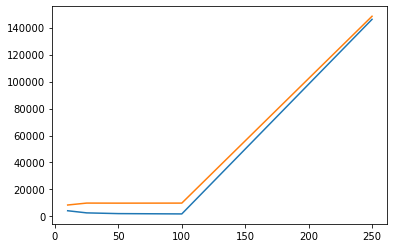

In [38]:
plt.plot(epochs_trial,training_loss, label='Training Losses')
plt.plot(epochs_trial,test_loss, label='Test Losses')

Weird result at 250 epochs


## 3. Example 2: ANN with ECFP and Molecular Weight data.

Used same ANN structure as Example 1

In [39]:
def get_model_example2():
    model = Sequential()
    model.add(Dense(512,input_shape=(1025,),activation='relu'))
    model.add(Dense(256, activation = 'relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3,activation='relu'))

    model.compile(loss='mse',optimizer='adam')
    return model

In [40]:
X_mol = ECFP_mol_weight.astype(float); y_mol= df[y_cols].astype(float)
X_mol_train, X_mol_test, y_mol_train, y_mol_test = train_test_split(X_mol, y_mol, test_size=0.20)

In [42]:
model_example2 = get_model_example2()
model_example2.fit(X_mol_train,y_mol_train,epochs=150)

Epoch 1/150
148/148 [==============================] - 1s 2ms/step - loss: 59249.3086
Epoch 2/150
148/148 [==============================] - 0s 2ms/step - loss: 9623.6377
Epoch 3/150
148/148 [==============================] - 0s 2ms/step - loss: 5749.8281
Epoch 4/150
148/148 [==============================] - 0s 2ms/step - loss: 4108.0605
Epoch 5/150
148/148 [==============================] - 0s 2ms/step - loss: 3395.0012
Epoch 6/150
148/148 [==============================] - 0s 2ms/step - loss: 3119.9116
Epoch 7/150
148/148 [==============================] - 0s 2ms/step - loss: 2955.8069
Epoch 8/150
148/148 [==============================] - 0s 2ms/step - loss: 2768.0830
Epoch 9/150
148/148 [==============================] - 0s 2ms/step - loss: 2540.3979
Epoch 10/150
148/148 [==============================] - 0s 2ms/step - loss: 2433.1621
Epoch 11/150
148/148 [==============================] - 0s 2ms/step - loss: 2358.1147
Epoch 12/150
148/148 [==============================] - 0s 2ms

In [43]:
model_example2.evaluate(X_mol_test,y_mol_test)

37/37 [==============================] - 0s 775us/step - loss: 5057.6396


5057.6396484375

##### Adding the molecular weight seems to have helped performance by a significant margin!

Try Different Numbers of Epochs (graphing out testing set loss)

In [44]:
epochs_mol = [10,25,50,100,150,250,300,350,400,500,600,700]

In [45]:
test_loss = []
predictions_mol = []

for epoch in epochs_mol:
    model=get_model_example2()
    model.fit(X_mol_train,y_mol_train,epochs=epoch)
    evaluation = model.evaluate(X_mol_test,y_mol_test)
    predictions = model.predict(X_mol_test)
    
    test_loss.append(evaluation)
    predictions_mol.append(predictions)

Epoch 1/10
148/148 [==============================] - 1s 2ms/step - loss: 59124.4414
Epoch 2/10
148/148 [==============================] - 0s 2ms/step - loss: 9654.0635
Epoch 3/10
148/148 [==============================] - 0s 2ms/step - loss: 5691.5176
Epoch 4/10
148/148 [==============================] - 0s 2ms/step - loss: 4052.7009
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 3342.0659
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 3068.6685
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 2811.4431
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 2619.3860
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 2475.3730
Epoch 10/10
37/37 [==============================] - 0s 803us/step - loss: 4639.9604
Epoch 1/25
148/148 [==============================] - 1s 2ms/step - loss: 59171.6055
Epoch 2/25
148/148 [==============================] - 0s 2ms/step - loss:

148/148 [==============================] - 0s 2ms/step - loss: 4077.3835
Epoch 5/150
148/148 [==============================] - 0s 2ms/step - loss: 3354.9602
Epoch 6/150
148/148 [==============================] - 0s 2ms/step - loss: 3050.1716
Epoch 7/150
148/148 [==============================] - 0s 2ms/step - loss: 2794.8474
Epoch 8/150
148/148 [==============================] - 0s 2ms/step - loss: 2608.0696
Epoch 9/150
148/148 [==============================] - 0s 2ms/step - loss: 2463.7949
Epoch 10/150
148/148 [==============================] - 0s 2ms/step - loss: 2351.8066
Epoch 11/150
148/148 [==============================] - 0s 2ms/step - loss: 2195.0925
Epoch 12/150
148/148 [==============================] - 0s 2ms/step - loss: 2110.5938
Epoch 13/150
148/148 [==============================] - 0s 2ms/step - loss: 2022.2206
Epoch 14/150
148/148 [==============================] - 0s 2ms/step - loss: 1961.9174
Epoch 15/150
148/148 [==============================] - 0s 2ms/step - lo

148/148 [==============================] - 0s 2ms/step - loss: 1133.1156
Epoch 44/250
148/148 [==============================] - 0s 2ms/step - loss: 1092.6461
Epoch 45/250
148/148 [==============================] - 0s 2ms/step - loss: 1143.9354
Epoch 46/250
148/148 [==============================] - 0s 2ms/step - loss: 1105.3125
Epoch 47/250
148/148 [==============================] - 0s 2ms/step - loss: 1075.4235
Epoch 48/250
148/148 [==============================] - 0s 2ms/step - loss: 1078.9833
Epoch 49/250
148/148 [==============================] - 0s 2ms/step - loss: 1066.5681
Epoch 50/250
148/148 [==============================] - 0s 2ms/step - loss: 1049.1759
Epoch 51/250
148/148 [==============================] - 0s 2ms/step - loss: 1047.6021
Epoch 52/250
148/148 [==============================] - 0s 2ms/step - loss: 1026.5320
Epoch 53/250
148/148 [==============================] - 0s 2ms/step - loss: 1017.6497
Epoch 54/250
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 515.3809
Epoch 234/250
148/148 [==============================] - 0s 2ms/step - loss: 495.2697
Epoch 235/250
148/148 [==============================] - 0s 2ms/step - loss: 477.1570
Epoch 236/250
148/148 [==============================] - 0s 2ms/step - loss: 497.2721
Epoch 237/250
148/148 [==============================] - 0s 2ms/step - loss: 496.8726
Epoch 238/250
148/148 [==============================] - 0s 2ms/step - loss: 492.0971
Epoch 239/250
148/148 [==============================] - 0s 2ms/step - loss: 519.4359
Epoch 240/250
148/148 [==============================] - 0s 2ms/step - loss: 512.9792
Epoch 241/250
148/148 [==============================] - 0s 2ms/step - loss: 509.0797
Epoch 242/250
148/148 [==============================] - 0s 2ms/step - loss: 495.2259
Epoch 243/250
148/148 [==============================] - 0s 2ms/step - loss: 468.4362
Epoch 244/250
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 572.8675
Epoch 173/300
148/148 [==============================] - 0s 2ms/step - loss: 571.6255
Epoch 174/300
148/148 [==============================] - 0s 2ms/step - loss: 584.7095
Epoch 175/300
148/148 [==============================] - 0s 2ms/step - loss: 592.4148
Epoch 176/300
148/148 [==============================] - 0s 2ms/step - loss: 610.5657
Epoch 177/300
148/148 [==============================] - 0s 2ms/step - loss: 586.1357
Epoch 178/300
148/148 [==============================] - 0s 2ms/step - loss: 610.1361
Epoch 179/300
148/148 [==============================] - 0s 2ms/step - loss: 587.1248
Epoch 180/300
148/148 [==============================] - 0s 2ms/step - loss: 574.1826
Epoch 181/300
148/148 [==============================] - 0s 2ms/step - loss: 561.6583
Epoch 182/300
148/148 [==============================] - 0s 2ms/step - loss: 586.9006
Epoch 183/300
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 500.4515
Epoch 268/300
148/148 [==============================] - 0s 2ms/step - loss: 515.5320
Epoch 269/300
148/148 [==============================] - 0s 2ms/step - loss: 496.6612
Epoch 270/300
148/148 [==============================] - 0s 2ms/step - loss: 485.3959
Epoch 271/300
148/148 [==============================] - 0s 2ms/step - loss: 474.6585
Epoch 272/300
148/148 [==============================] - 0s 2ms/step - loss: 481.4057
Epoch 273/300
148/148 [==============================] - 0s 2ms/step - loss: 488.1505
Epoch 274/300
148/148 [==============================] - 0s 2ms/step - loss: 482.3747
Epoch 275/300
148/148 [==============================] - 0s 2ms/step - loss: 498.0596
Epoch 276/300
148/148 [==============================] - 0s 2ms/step - loss: 490.7979
Epoch 277/300
148/148 [==============================] - 0s 2ms/step - loss: 488.0910
Epoch 278/300
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 592.3228
Epoch 157/350
148/148 [==============================] - 0s 2ms/step - loss: 625.4400
Epoch 158/350
148/148 [==============================] - 0s 2ms/step - loss: 616.4617
Epoch 159/350
148/148 [==============================] - 0s 2ms/step - loss: 614.1827
Epoch 160/350
148/148 [==============================] - 0s 2ms/step - loss: 592.1686
Epoch 161/350
148/148 [==============================] - 0s 2ms/step - loss: 596.4954
Epoch 162/350
148/148 [==============================] - 0s 2ms/step - loss: 598.3784
Epoch 163/350
148/148 [==============================] - 0s 2ms/step - loss: 588.0799
Epoch 164/350
148/148 [==============================] - 0s 2ms/step - loss: 576.3444
Epoch 165/350
148/148 [==============================] - 0s 2ms/step - loss: 565.0039
Epoch 166/350
148/148 [==============================] - 0s 2ms/step - loss: 594.7291
Epoch 167/350
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 483.4644
Epoch 252/350
148/148 [==============================] - 0s 2ms/step - loss: 478.6422
Epoch 253/350
148/148 [==============================] - 0s 2ms/step - loss: 452.5878
Epoch 254/350
148/148 [==============================] - 0s 2ms/step - loss: 468.0236
Epoch 255/350
148/148 [==============================] - 0s 2ms/step - loss: 481.8910
Epoch 256/350
148/148 [==============================] - 0s 2ms/step - loss: 463.7395
Epoch 257/350
148/148 [==============================] - 0s 2ms/step - loss: 470.1513
Epoch 258/350
148/148 [==============================] - 0s 2ms/step - loss: 449.5590
Epoch 259/350
148/148 [==============================] - 0s 2ms/step - loss: 450.5143
Epoch 260/350
148/148 [==============================] - 0s 2ms/step - loss: 462.6460
Epoch 261/350
148/148 [==============================] - 0s 2ms/step - loss: 455.7267
Epoch 262/350
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 145551.4531
Epoch 88/400
148/148 [==============================] - 0s 2ms/step - loss: 145542.6875
Epoch 89/400
148/148 [==============================] - 0s 2ms/step - loss: 145557.0781
Epoch 90/400
148/148 [==============================] - 0s 2ms/step - loss: 145545.6562
Epoch 91/400
148/148 [==============================] - 0s 2ms/step - loss: 145540.9844
Epoch 92/400
148/148 [==============================] - 0s 2ms/step - loss: 145540.4219
Epoch 93/400
148/148 [==============================] - 0s 2ms/step - loss: 145540.8594
Epoch 94/400
148/148 [==============================] - 0s 2ms/step - loss: 145532.5625
Epoch 95/400
148/148 [==============================] - 0s 2ms/step - loss: 145541.5156
Epoch 96/400
148/148 [==============================] - 0s 2ms/step - loss: 145539.3750
Epoch 97/400
148/148 [==============================] - 0s 2ms/step - loss: 145531.6094
Epoch 98/400
148/148 [=======================

148/148 [==============================] - 0s 2ms/step - loss: 145439.2656
Epoch 271/400
148/148 [==============================] - 0s 2ms/step - loss: 145442.6875
Epoch 272/400
148/148 [==============================] - 0s 2ms/step - loss: 145438.7188
Epoch 273/400
148/148 [==============================] - 0s 2ms/step - loss: 145441.8906
Epoch 274/400
148/148 [==============================] - 0s 2ms/step - loss: 145433.6719
Epoch 275/400
148/148 [==============================] - 0s 2ms/step - loss: 145432.4688
Epoch 276/400
148/148 [==============================] - 0s 2ms/step - loss: 145434.4531
Epoch 277/400
148/148 [==============================] - 0s 2ms/step - loss: 145438.8750
Epoch 278/400
148/148 [==============================] - 0s 2ms/step - loss: 145433.7969
Epoch 279/400
148/148 [==============================] - 0s 2ms/step - loss: 145436.9062
Epoch 280/400
148/148 [==============================] - 0s 2ms/step - loss: 145437.3750
Epoch 281/400
148/148 [============

148/148 [==============================] - 0s 2ms/step - loss: 448.2120
Epoch 365/400
148/148 [==============================] - 0s 2ms/step - loss: 436.7046
Epoch 366/400
148/148 [==============================] - 0s 2ms/step - loss: 422.9362
Epoch 367/400
148/148 [==============================] - 0s 2ms/step - loss: 412.7744
Epoch 368/400
148/148 [==============================] - 0s 2ms/step - loss: 428.0842
Epoch 369/400
148/148 [==============================] - 0s 2ms/step - loss: 417.4669
Epoch 370/400
148/148 [==============================] - 0s 2ms/step - loss: 424.1810
Epoch 371/400
148/148 [==============================] - 0s 2ms/step - loss: 426.4672
Epoch 372/400
148/148 [==============================] - 0s 2ms/step - loss: 409.7025
Epoch 373/400
148/148 [==============================] - 0s 2ms/step - loss: 418.7789
Epoch 374/400
148/148 [==============================] - 0s 2ms/step - loss: 420.8474
Epoch 375/400
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 74125.6875
Epoch 151/500
148/148 [==============================] - 0s 2ms/step - loss: 74146.1562
Epoch 152/500
148/148 [==============================] - 0s 2ms/step - loss: 74131.6094
Epoch 153/500
148/148 [==============================] - 0s 2ms/step - loss: 74117.7656
Epoch 154/500
148/148 [==============================] - 0s 2ms/step - loss: 74107.8281
Epoch 155/500
148/148 [==============================] - 0s 2ms/step - loss: 74109.6562
Epoch 156/500
148/148 [==============================] - 0s 2ms/step - loss: 74119.8359
Epoch 157/500
148/148 [==============================] - 0s 2ms/step - loss: 74122.3750
Epoch 158/500
148/148 [==============================] - 0s 2ms/step - loss: 74129.6406
Epoch 159/500
148/148 [==============================] - 0s 2ms/step - loss: 74119.9766
Epoch 160/500
148/148 [==============================] - 0s 2ms/step - loss: 74109.6172
Epoch 161/500
148/148 [=======================

148/148 [==============================] - 0s 2ms/step - loss: 74017.0078
Epoch 337/500
148/148 [==============================] - 0s 2ms/step - loss: 74009.8594
Epoch 338/500
148/148 [==============================] - 0s 2ms/step - loss: 74018.2344
Epoch 339/500
148/148 [==============================] - 0s 2ms/step - loss: 74017.0625
Epoch 340/500
148/148 [==============================] - 0s 2ms/step - loss: 74015.2422
Epoch 341/500
148/148 [==============================] - 0s 2ms/step - loss: 74010.9297
Epoch 342/500
148/148 [==============================] - 0s 2ms/step - loss: 74011.0312
Epoch 343/500
148/148 [==============================] - 0s 2ms/step - loss: 74037.5938
Epoch 344/500
148/148 [==============================] - 0s 2ms/step - loss: 74017.0156
Epoch 345/500
148/148 [==============================] - 0s 2ms/step - loss: 74021.4609
Epoch 346/500
148/148 [==============================] - 0s 2ms/step - loss: 74016.0000
Epoch 347/500
148/148 [=======================

Epoch 22/600
148/148 [==============================] - 0s 2ms/step - loss: 1566.8805
Epoch 23/600
148/148 [==============================] - 0s 2ms/step - loss: 1487.6656
Epoch 24/600
148/148 [==============================] - 0s 2ms/step - loss: 1455.6438
Epoch 25/600
148/148 [==============================] - 0s 2ms/step - loss: 1425.1290
Epoch 26/600
148/148 [==============================] - 0s 2ms/step - loss: 1397.6761
Epoch 27/600
148/148 [==============================] - 0s 2ms/step - loss: 1373.0060
Epoch 28/600
148/148 [==============================] - 0s 2ms/step - loss: 1313.8422
Epoch 29/600
148/148 [==============================] - 0s 2ms/step - loss: 1315.2902
Epoch 30/600
148/148 [==============================] - 0s 2ms/step - loss: 1299.8644
Epoch 31/600
148/148 [==============================] - 0s 2ms/step - loss: 1297.6012
Epoch 32/600
148/148 [==============================] - 0s 2ms/step - loss: 1313.3362
Epoch 33/600
148/148 [==============================] 

148/148 [==============================] - 0s 2ms/step - loss: 522.9913
Epoch 213/600
148/148 [==============================] - 0s 2ms/step - loss: 524.3850
Epoch 214/600
148/148 [==============================] - 0s 2ms/step - loss: 501.5992
Epoch 215/600
148/148 [==============================] - 0s 2ms/step - loss: 500.3440
Epoch 216/600
148/148 [==============================] - 0s 3ms/step - loss: 529.9706
Epoch 217/600
148/148 [==============================] - 0s 2ms/step - loss: 511.9223
Epoch 218/600
148/148 [==============================] - 0s 2ms/step - loss: 544.6447
Epoch 219/600
148/148 [==============================] - 0s 2ms/step - loss: 517.1706
Epoch 220/600
148/148 [==============================] - 0s 2ms/step - loss: 517.9484
Epoch 221/600
148/148 [==============================] - 0s 2ms/step - loss: 517.1791
Epoch 222/600
148/148 [==============================] - 0s 2ms/step - loss: 513.8896
Epoch 223/600
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 398.1119
Epoch 403/600
148/148 [==============================] - 0s 2ms/step - loss: 406.2135
Epoch 404/600
148/148 [==============================] - 0s 2ms/step - loss: 381.1130
Epoch 405/600
148/148 [==============================] - 0s 2ms/step - loss: 384.0431
Epoch 406/600
148/148 [==============================] - 0s 2ms/step - loss: 405.7667
Epoch 407/600
148/148 [==============================] - 0s 2ms/step - loss: 372.6010
Epoch 408/600
148/148 [==============================] - 0s 2ms/step - loss: 390.8396
Epoch 409/600
148/148 [==============================] - 0s 2ms/step - loss: 389.4909
Epoch 410/600
148/148 [==============================] - 0s 2ms/step - loss: 399.5856
Epoch 411/600
148/148 [==============================] - 0s 2ms/step - loss: 384.6488
Epoch 412/600
148/148 [==============================] - 0s 2ms/step - loss: 399.8167
Epoch 413/600
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 330.6175
Epoch 593/600
148/148 [==============================] - 0s 2ms/step - loss: 328.9776
Epoch 594/600
148/148 [==============================] - 0s 2ms/step - loss: 325.6884
Epoch 595/600
148/148 [==============================] - 0s 2ms/step - loss: 319.4219
Epoch 596/600
148/148 [==============================] - 0s 2ms/step - loss: 337.0944
Epoch 597/600
148/148 [==============================] - 0s 2ms/step - loss: 333.9821
Epoch 598/600
148/148 [==============================] - 0s 2ms/step - loss: 336.1025
Epoch 599/600
148/148 [==============================] - 0s 2ms/step - loss: 341.8774
Epoch 600/600
37/37 [==============================] - 0s 859us/step - loss: 4632.4019
Epoch 1/700
148/148 [==============================] - 1s 2ms/step - loss: 59616.6016
Epoch 2/700
148/148 [==============================] - 0s 2ms/step - loss: 9884.4678
Epoch 3/700
148/148 [==============================] - 0s 2ms/step -

148/148 [==============================] - 0s 2ms/step - loss: 548.6093
Epoch 182/700
148/148 [==============================] - 0s 2ms/step - loss: 568.8742
Epoch 183/700
148/148 [==============================] - 0s 2ms/step - loss: 549.8616
Epoch 184/700
148/148 [==============================] - 0s 2ms/step - loss: 577.6651
Epoch 185/700
148/148 [==============================] - 0s 2ms/step - loss: 553.3090
Epoch 186/700
148/148 [==============================] - 0s 2ms/step - loss: 555.9922
Epoch 187/700
148/148 [==============================] - 0s 2ms/step - loss: 557.2179
Epoch 188/700
148/148 [==============================] - 0s 2ms/step - loss: 545.3073
Epoch 189/700
148/148 [==============================] - 0s 2ms/step - loss: 545.3245A: 0s - loss: 39
Epoch 190/700
148/148 [==============================] - 0s 2ms/step - loss: 568.1616
Epoch 191/700
148/148 [==============================] - 0s 2ms/step - loss: 548.3019
Epoch 192/700
148/148 [=============================

148/148 [==============================] - 0s 2ms/step - loss: 388.1950
Epoch 372/700
148/148 [==============================] - 0s 2ms/step - loss: 380.5991
Epoch 373/700
148/148 [==============================] - 0s 2ms/step - loss: 388.4200
Epoch 374/700
148/148 [==============================] - 0s 2ms/step - loss: 388.5734
Epoch 375/700
148/148 [==============================] - 0s 2ms/step - loss: 391.3592
Epoch 376/700
148/148 [==============================] - 0s 2ms/step - loss: 402.9438
Epoch 377/700
148/148 [==============================] - 0s 2ms/step - loss: 388.3320
Epoch 378/700
148/148 [==============================] - 0s 2ms/step - loss: 384.0416
Epoch 379/700
148/148 [==============================] - 0s 2ms/step - loss: 379.7000
Epoch 380/700
148/148 [==============================] - 0s 2ms/step - loss: 380.0471
Epoch 381/700
148/148 [==============================] - 0s 2ms/step - loss: 380.8328
Epoch 382/700
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 346.2536
Epoch 562/700
148/148 [==============================] - 0s 2ms/step - loss: 340.5694
Epoch 563/700
148/148 [==============================] - 0s 2ms/step - loss: 324.4278
Epoch 564/700
148/148 [==============================] - 0s 2ms/step - loss: 329.3312
Epoch 565/700
148/148 [==============================] - 0s 2ms/step - loss: 334.5842
Epoch 566/700
148/148 [==============================] - 0s 2ms/step - loss: 326.3006
Epoch 567/700
148/148 [==============================] - 0s 2ms/step - loss: 337.7498
Epoch 568/700
148/148 [==============================] - 0s 2ms/step - loss: 316.9676
Epoch 569/700
148/148 [==============================] - 0s 2ms/step - loss: 317.8064
Epoch 570/700
148/148 [==============================] - 0s 2ms/step - loss: 329.6436
Epoch 571/700
148/148 [==============================] - 0s 2ms/step - loss: 320.5629
Epoch 572/700
148/148 [==============================] - 0s 2ms/step

In [46]:
test_loss

[4639.96044921875,
 4813.642578125,
 76807.953125,
 4992.14794921875,
 4816.30615234375,
 4713.921875,
 4899.56591796875,
 4782.07177734375,
 4535.91357421875,
 76808.03125,
 4632.40185546875,
 4588.806640625]

Get percentage error for epochs = 600 (as it had the lowest test_loss)

In [47]:
predictions

array([[695.76526,   0.     , 502.46097],
       [535.94977,   0.     , 367.69376],
       [585.2989 ,   0.     , 435.7642 ],
       ...,
       [673.122  ,   0.     , 456.89813],
       [604.9443 ,   0.     , 406.88623],
       [615.16406,   0.     , 423.97946]], dtype=float32)

In [48]:
perc_errors_mol = np.abs((y_mol_test-predictions)/y_mol_test)*100

In [49]:
perc_errors_mol.describe()

,critical temperature (K),acentric factor,boiling point (K)
count,1180.000000,1180.0,1180.000000
mean,10.791609,100.0,12.302538
std,19.691572,0.0,22.772042
min,0.003058,100.0,0.008361
25%,2.993643,100.0,3.580218
50%,6.991423,100.0,8.136804
75%,14.165496,100.0,15.025343
max,510.659953,100.0,576.225977


In [50]:
predictions_mol_df = pd.DataFrame(predictions, columns = y_cols)
predictions_mol_df.head()

,critical temperature (K),acentric factor,boiling point (K)
0,695.765259,0.0,502.460968
1,535.949768,0.0,367.693756
2,585.298889,0.0,435.764191
3,541.309021,0.0,367.591217
4,619.166992,0.0,443.090973


In [51]:
y_mol_test.head()

,critical temperature (K),acentric factor,boiling point (K)
5556,788.50,0.481,579.65
4688,558.21,0.307,385.65
3236,622.52,0.449,450.15
5641,640.07,0.291,446.70
1249,594.00,0.410,420.02


Since this model is not effective for Acentric factor, train a multi-output regression network for Critical Temperature and Boiling Point. Variables for this model type will be labeled with "final"

## 4. Multi-output ANN (Critical and Boiling temperatures only)

In [52]:
y_cols_final = ['critical temperature (K)','boiling point (K)']

In [53]:
X_final = ECFP_mol_weight.astype(float); y_final= df[y_cols_final].astype(float)
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X_final, y_final, test_size=0.20)

In [72]:
def get_model(layer_dims,activations,n_input=1025,loss_f='mse'):
    """Returns a compiled model using input layer_dims & activations. layer_dims = [512,256,2]
    Will return a layer with 2 hidden layers with 512,256 units and an output layer
    with 2 units"""
    model = Sequential()
    #First hidden layer
    model.add(Dense(layer_dims[0],input_shape=(n_input,),activation=activations[0]))
    
    #Other hidden layers
    for i in range(1,len(layer_dims)-1):
        model.add(Dense(layer_dims[i],activation=activations[i]))

    model.add(Dense(layer_dims[-1],activation=activations[-1]))

    model.compile(loss=loss_f,optimizer='adam')
    return model

In [55]:
layer_dims = [512,256,64,2]
activations = ['relu','relu','relu','relu']
trial_epochs = [10,25,50,75,100,150,200,300,400,500,600,750]
test_loss_final = []
for epoch in trial_epochs:  
    model = get_model(layer_dims,activations)
    model.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model.evaluate(X_final_test,y_final_test)
    
    test_loss_final.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 2ms/step - loss: 91778.8438
Epoch 2/10
148/148 [==============================] - 0s 2ms/step - loss: 14454.7373
Epoch 3/10
148/148 [==============================] - 0s 2ms/step - loss: 8616.9326
Epoch 4/10
148/148 [==============================] - 0s 2ms/step - loss: 6035.2690
Epoch 5/10
148/148 [==============================] - 0s 2ms/step - loss: 5016.2275
Epoch 6/10
148/148 [==============================] - 0s 2ms/step - loss: 4508.9194
Epoch 7/10
148/148 [==============================] - 0s 2ms/step - loss: 4181.1108
Epoch 8/10
148/148 [==============================] - 0s 2ms/step - loss: 3942.1487
Epoch 9/10
148/148 [==============================] - 0s 2ms/step - loss: 3709.2397
Epoch 10/10
37/37 [==============================] - 0s 860us/step - loss: 6690.0278
Epoch 1/25
148/148 [==============================] - 1s 2ms/step - loss: 246360.7344
Epoch 2/25
148/148 [==============================] - 0s 2ms/step - los

148/148 [==============================] - 0s 2ms/step - loss: 1862.9740
Epoch 30/100
148/148 [==============================] - 0s 2ms/step - loss: 1792.7074
Epoch 31/100
148/148 [==============================] - 0s 2ms/step - loss: 1822.9580
Epoch 32/100
148/148 [==============================] - 0s 2ms/step - loss: 1780.8116
Epoch 33/100
148/148 [==============================] - 0s 2ms/step - loss: 1765.0609
Epoch 34/100
148/148 [==============================] - 0s 2ms/step - loss: 1704.9395
Epoch 35/100
148/148 [==============================] - 0s 2ms/step - loss: 1702.4202
Epoch 36/100
148/148 [==============================] - 0s 2ms/step - loss: 1638.8309
Epoch 37/100
148/148 [==============================] - 0s 2ms/step - loss: 1663.3103
Epoch 38/100
148/148 [==============================] - 0s 2ms/step - loss: 1674.5125
Epoch 39/100
148/148 [==============================] - 0s 2ms/step - loss: 1643.6693
Epoch 40/100
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 111727.3438
Epoch 24/150
148/148 [==============================] - 0s 2ms/step - loss: 111696.9219
Epoch 25/150
148/148 [==============================] - 0s 2ms/step - loss: 111640.9844
Epoch 26/150
148/148 [==============================] - 0s 2ms/step - loss: 111660.5156
Epoch 27/150
148/148 [==============================] - 0s 3ms/step - loss: 111706.7969
Epoch 28/150
148/148 [==============================] - 0s 2ms/step - loss: 111600.7344
Epoch 29/150
148/148 [==============================] - 0s 2ms/step - loss: 111597.4062
Epoch 30/150
148/148 [==============================] - 0s 2ms/step - loss: 111540.9844
Epoch 31/150
148/148 [==============================] - 0s 2ms/step - loss: 111552.9375
Epoch 32/150
148/148 [==============================] - 0s 3ms/step - loss: 111552.6953
Epoch 33/150
148/148 [==============================] - 0s 2ms/step - loss: 111512.2969
Epoch 34/150
148/148 [=======================

148/148 [==============================] - 0s 2ms/step - loss: 1388.0184
Epoch 59/200
148/148 [==============================] - 0s 2ms/step - loss: 1369.2589
Epoch 60/200
148/148 [==============================] - 0s 2ms/step - loss: 1392.6783
Epoch 61/200
148/148 [==============================] - 0s 2ms/step - loss: 1393.1984
Epoch 62/200
148/148 [==============================] - 0s 2ms/step - loss: 1409.2976
Epoch 63/200
148/148 [==============================] - 0s 2ms/step - loss: 1314.3038
Epoch 64/200
148/148 [==============================] - 0s 2ms/step - loss: 1363.0641
Epoch 65/200
148/148 [==============================] - 0s 2ms/step - loss: 1287.0992
Epoch 66/200
148/148 [==============================] - 0s 2ms/step - loss: 1282.1357
Epoch 67/200
148/148 [==============================] - 0s 2ms/step - loss: 1277.4203
Epoch 68/200
148/148 [==============================] - 0s 2ms/step - loss: 1269.4071
Epoch 69/200
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 1623.8241
Epoch 48/300
148/148 [==============================] - 0s 2ms/step - loss: 1602.7920
Epoch 49/300
148/148 [==============================] - 0s 2ms/step - loss: 1532.0306
Epoch 50/300
148/148 [==============================] - 0s 2ms/step - loss: 1540.3811
Epoch 51/300
148/148 [==============================] - 0s 2ms/step - loss: 1606.6315
Epoch 52/300
148/148 [==============================] - 0s 2ms/step - loss: 1522.0214
Epoch 53/300
148/148 [==============================] - 0s 2ms/step - loss: 1509.6276
Epoch 54/300
148/148 [==============================] - 0s 2ms/step - loss: 1503.9829
Epoch 55/300
148/148 [==============================] - 0s 2ms/step - loss: 1444.7106
Epoch 56/300
148/148 [==============================] - 0s 2ms/step - loss: 1443.1190
Epoch 57/300
148/148 [==============================] - 0s 2ms/step - loss: 1525.2086
Epoch 58/300
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 917.7444
Epoch 143/300
148/148 [==============================] - 0s 2ms/step - loss: 926.5995
Epoch 144/300
148/148 [==============================] - 0s 2ms/step - loss: 937.7261
Epoch 145/300
148/148 [==============================] - 0s 2ms/step - loss: 911.5087
Epoch 146/300
148/148 [==============================] - 0s 2ms/step - loss: 963.5763
Epoch 147/300
148/148 [==============================] - 0s 3ms/step - loss: 916.3142
Epoch 148/300
148/148 [==============================] - 0s 3ms/step - loss: 897.3843
Epoch 149/300
148/148 [==============================] - 0s 2ms/step - loss: 897.5923
Epoch 150/300
148/148 [==============================] - 0s 2ms/step - loss: 888.1629
Epoch 151/300
148/148 [==============================] - 0s 2ms/step - loss: 884.8831
Epoch 152/300
148/148 [==============================] - 0s 2ms/step - loss: 874.0040
Epoch 153/300
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 755.5925
Epoch 238/300
148/148 [==============================] - 0s 2ms/step - loss: 720.1190
Epoch 239/300
148/148 [==============================] - 0s 2ms/step - loss: 737.2151
Epoch 240/300
148/148 [==============================] - 0s 2ms/step - loss: 739.0094
Epoch 241/300
148/148 [==============================] - 0s 2ms/step - loss: 738.9224
Epoch 242/300
148/148 [==============================] - 0s 2ms/step - loss: 727.1228
Epoch 243/300
148/148 [==============================] - 0s 2ms/step - loss: 720.8865
Epoch 244/300
148/148 [==============================] - 0s 2ms/step - loss: 722.6574
Epoch 245/300
148/148 [==============================] - 0s 2ms/step - loss: 753.4070
Epoch 246/300
148/148 [==============================] - 0s 2ms/step - loss: 745.4974
Epoch 247/300
148/148 [==============================] - 0s 2ms/step - loss: 716.7298
Epoch 248/300
148/148 [==============================] - 0s 2ms/step

Epoch 123/400
148/148 [==============================] - 0s 2ms/step - loss: 218094.7812
Epoch 124/400
148/148 [==============================] - 0s 2ms/step - loss: 218091.5312
Epoch 125/400
148/148 [==============================] - 0s 2ms/step - loss: 218101.0000
Epoch 126/400
148/148 [==============================] - 0s 2ms/step - loss: 218096.6094
Epoch 127/400
148/148 [==============================] - 0s 2ms/step - loss: 218075.4375
Epoch 128/400
148/148 [==============================] - 0s 2ms/step - loss: 218085.2188
Epoch 129/400
148/148 [==============================] - 0s 2ms/step - loss: 218081.7188
Epoch 130/400
148/148 [==============================] - 0s 2ms/step - loss: 218086.6406
Epoch 131/400
148/148 [==============================] - 0s 2ms/step - loss: 218101.1719
Epoch 132/400
148/148 [==============================] - 0s 2ms/step - loss: 218097.0000
Epoch 133/400
148/148 [==============================] - 0s 2ms/step - loss: 218083.3125
Epoch 134/400
148/148

148/148 [==============================] - 0s 2ms/step - loss: 217998.7812
Epoch 307/400
148/148 [==============================] - 0s 2ms/step - loss: 217994.0625
Epoch 308/400
148/148 [==============================] - 0s 2ms/step - loss: 217984.8281
Epoch 309/400
148/148 [==============================] - 0s 2ms/step - loss: 217986.5156
Epoch 310/400
148/148 [==============================] - 0s 2ms/step - loss: 217988.6719
Epoch 311/400
148/148 [==============================] - 0s 2ms/step - loss: 217985.6406
Epoch 312/400
148/148 [==============================] - 0s 2ms/step - loss: 217981.7344
Epoch 313/400
148/148 [==============================] - 0s 2ms/step - loss: 217984.9219
Epoch 314/400
148/148 [==============================] - 0s 2ms/step - loss: 217987.4375
Epoch 315/400
148/148 [==============================] - 0s 2ms/step - loss: 217988.3750
Epoch 316/400
148/148 [==============================] - 0s 2ms/step - loss: 217982.6250
Epoch 317/400
148/148 [============

Epoch 398/400
148/148 [==============================] - 0s 2ms/step - loss: 217966.0156
Epoch 399/400
148/148 [==============================] - 0s 2ms/step - loss: 217964.4688
Epoch 400/400
37/37 [==============================] - 0s 889us/step - loss: 220380.9375
Epoch 1/500
148/148 [==============================] - 1s 2ms/step - loss: 167960.9688
Epoch 2/500
148/148 [==============================] - 0s 2ms/step - loss: 119339.0781
Epoch 3/500
148/148 [==============================] - 0s 2ms/step - loss: 115720.0234
Epoch 4/500
148/148 [==============================] - 0s 2ms/step - loss: 114163.2422
Epoch 5/500
148/148 [==============================] - 0s 2ms/step - loss: 113459.8203
Epoch 6/500
148/148 [==============================] - 0s 2ms/step - loss: 113183.3906
Epoch 7/500
148/148 [==============================] - 0s 2ms/step - loss: 112969.5469
Epoch 8/500
148/148 [==============================] - 0s 2ms/step - loss: 112767.7891
Epoch 9/500
148/148 [================

148/148 [==============================] - 0s 2ms/step - loss: 111111.5547
Epoch 183/500
148/148 [==============================] - 0s 2ms/step - loss: 111095.0234
Epoch 184/500
148/148 [==============================] - 0s 2ms/step - loss: 111093.5938
Epoch 185/500
148/148 [==============================] - 0s 2ms/step - loss: 111078.9531
Epoch 186/500
148/148 [==============================] - 0s 2ms/step - loss: 111080.1172
Epoch 187/500
148/148 [==============================] - 0s 2ms/step - loss: 111077.4609
Epoch 188/500
148/148 [==============================] - 0s 2ms/step - loss: 111080.8984
Epoch 189/500
148/148 [==============================] - 0s 2ms/step - loss: 111085.2578
Epoch 190/500
148/148 [==============================] - 0s 2ms/step - loss: 111068.8438
Epoch 191/500
148/148 [==============================] - 0s 2ms/step - loss: 111079.0234
Epoch 192/500
148/148 [==============================] - 0s 2ms/step - loss: 111087.6641
Epoch 193/500
148/148 [============

148/148 [==============================] - 0s 2ms/step - loss: 110975.2578
Epoch 367/500
148/148 [==============================] - 0s 2ms/step - loss: 110987.1953
Epoch 368/500
148/148 [==============================] - 0s 2ms/step - loss: 110982.0000
Epoch 369/500
148/148 [==============================] - 0s 2ms/step - loss: 110974.6562
Epoch 370/500
148/148 [==============================] - 0s 2ms/step - loss: 110985.3984
Epoch 371/500
148/148 [==============================] - 0s 2ms/step - loss: 110976.8984
Epoch 372/500
148/148 [==============================] - 0s 2ms/step - loss: 110980.6484
Epoch 373/500
148/148 [==============================] - 0s 2ms/step - loss: 110970.9766
Epoch 374/500
148/148 [==============================] - 0s 2ms/step - loss: 110980.6094
Epoch 375/500
148/148 [==============================] - 0s 2ms/step - loss: 110965.8750
Epoch 376/500
148/148 [==============================] - 0s 2ms/step - loss: 110969.3672
Epoch 377/500
148/148 [============

148/148 [==============================] - 0s 2ms/step - loss: 1528.3688
Epoch 52/600
148/148 [==============================] - 0s 2ms/step - loss: 1459.2087
Epoch 53/600
148/148 [==============================] - 0s 2ms/step - loss: 1484.6213
Epoch 54/600
148/148 [==============================] - 0s 2ms/step - loss: 1440.9366
Epoch 55/600
148/148 [==============================] - 0s 2ms/step - loss: 1502.9153
Epoch 56/600
148/148 [==============================] - 0s 2ms/step - loss: 1477.2946
Epoch 57/600
148/148 [==============================] - 0s 2ms/step - loss: 1462.7003
Epoch 58/600
148/148 [==============================] - 0s 2ms/step - loss: 1400.7516
Epoch 59/600
148/148 [==============================] - 0s 2ms/step - loss: 1387.0597
Epoch 60/600
148/148 [==============================] - 0s 2ms/step - loss: 1368.2240
Epoch 61/600
148/148 [==============================] - 0s 2ms/step - loss: 1400.4706
Epoch 62/600
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 706.3631
Epoch 242/600
148/148 [==============================] - 0s 2ms/step - loss: 725.9686
Epoch 243/600
148/148 [==============================] - 0s 2ms/step - loss: 764.0105
Epoch 244/600
148/148 [==============================] - 0s 2ms/step - loss: 737.3910
Epoch 245/600
148/148 [==============================] - 0s 2ms/step - loss: 711.0482
Epoch 246/600
148/148 [==============================] - 0s 2ms/step - loss: 728.8297
Epoch 247/600
148/148 [==============================] - 0s 2ms/step - loss: 743.5782
Epoch 248/600
148/148 [==============================] - 0s 2ms/step - loss: 740.8547
Epoch 249/600
148/148 [==============================] - 0s 2ms/step - loss: 732.5316
Epoch 250/600
148/148 [==============================] - 0s 2ms/step - loss: 717.3024
Epoch 251/600
148/148 [==============================] - 0s 2ms/step - loss: 719.6251
Epoch 252/600
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 1s 5ms/step - loss: 528.5031
Epoch 432/600
148/148 [==============================] - 0s 2ms/step - loss: 513.7645
Epoch 433/600
148/148 [==============================] - 0s 2ms/step - loss: 507.6023
Epoch 434/600
148/148 [==============================] - 0s 2ms/step - loss: 512.4171
Epoch 435/600
148/148 [==============================] - 0s 2ms/step - loss: 506.9524
Epoch 436/600
148/148 [==============================] - 0s 2ms/step - loss: 525.9499
Epoch 437/600
148/148 [==============================] - 0s 2ms/step - loss: 531.0629
Epoch 438/600
148/148 [==============================] - 0s 2ms/step - loss: 538.0325
Epoch 439/600
148/148 [==============================] - 0s 2ms/step - loss: 508.4872
Epoch 440/600
148/148 [==============================] - 0s 2ms/step - loss: 518.4836
Epoch 441/600
148/148 [==============================] - 0s 2ms/step - loss: 523.9926
Epoch 442/600
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 2282.5828
Epoch 21/750
148/148 [==============================] - 0s 2ms/step - loss: 2189.8743
Epoch 22/750
148/148 [==============================] - 0s 2ms/step - loss: 2194.2825
Epoch 23/750
148/148 [==============================] - 0s 2ms/step - loss: 2146.3989
Epoch 24/750
148/148 [==============================] - 0s 2ms/step - loss: 2068.3889
Epoch 25/750
148/148 [==============================] - 0s 2ms/step - loss: 1989.2714
Epoch 26/750
148/148 [==============================] - 0s 2ms/step - loss: 2100.5413
Epoch 27/750
148/148 [==============================] - 0s 2ms/step - loss: 2029.6661
Epoch 28/750
148/148 [==============================] - 0s 2ms/step - loss: 1969.0303
Epoch 29/750
148/148 [==============================] - 0s 2ms/step - loss: 2017.6976
Epoch 30/750
148/148 [==============================] - 0s 2ms/step - loss: 1927.1688
Epoch 31/750
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 773.6113
Epoch 211/750
148/148 [==============================] - 0s 2ms/step - loss: 807.0526
Epoch 212/750
148/148 [==============================] - 0s 2ms/step - loss: 787.8861
Epoch 213/750
148/148 [==============================] - 0s 2ms/step - loss: 766.4276
Epoch 214/750
148/148 [==============================] - 0s 2ms/step - loss: 812.8412
Epoch 215/750
148/148 [==============================] - 0s 2ms/step - loss: 780.8311
Epoch 216/750
148/148 [==============================] - 0s 2ms/step - loss: 794.0898
Epoch 217/750
148/148 [==============================] - 0s 2ms/step - loss: 771.8234
Epoch 218/750
148/148 [==============================] - 0s 2ms/step - loss: 820.1761
Epoch 219/750
148/148 [==============================] - 0s 2ms/step - loss: 745.5640
Epoch 220/750
148/148 [==============================] - 0s 2ms/step - loss: 762.5070
Epoch 221/750
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 604.4011
Epoch 401/750
148/148 [==============================] - 0s 2ms/step - loss: 577.6899
Epoch 402/750
148/148 [==============================] - 0s 2ms/step - loss: 569.4698
Epoch 403/750
148/148 [==============================] - 0s 2ms/step - loss: 557.9163
Epoch 404/750
148/148 [==============================] - 0s 2ms/step - loss: 567.6423
Epoch 405/750
148/148 [==============================] - 0s 2ms/step - loss: 582.2322
Epoch 406/750
148/148 [==============================] - 0s 2ms/step - loss: 580.6172
Epoch 407/750
148/148 [==============================] - 0s 2ms/step - loss: 568.7957
Epoch 408/750
148/148 [==============================] - 0s 2ms/step - loss: 549.2879
Epoch 409/750
148/148 [==============================] - 0s 2ms/step - loss: 553.3144
Epoch 410/750
148/148 [==============================] - 0s 2ms/step - loss: 535.5657
Epoch 411/750
148/148 [==============================] - 0s 2ms/step

148/148 [==============================] - 0s 2ms/step - loss: 476.4424
Epoch 591/750
148/148 [==============================] - 0s 2ms/step - loss: 466.1634
Epoch 592/750
148/148 [==============================] - 0s 2ms/step - loss: 484.2925
Epoch 593/750
148/148 [==============================] - 0s 2ms/step - loss: 460.5188
Epoch 594/750
148/148 [==============================] - 0s 2ms/step - loss: 475.5023
Epoch 595/750
148/148 [==============================] - 0s 2ms/step - loss: 527.4327
Epoch 596/750
148/148 [==============================] - 0s 2ms/step - loss: 494.9302
Epoch 597/750
148/148 [==============================] - 0s 2ms/step - loss: 457.4300
Epoch 598/750
148/148 [==============================] - 0s 2ms/step - loss: 448.5461
Epoch 599/750
148/148 [==============================] - 0s 2ms/step - loss: 457.4502
Epoch 600/750
148/148 [==============================] - 0s 2ms/step - loss: 450.0236
Epoch 601/750
148/148 [==============================] - 0s 2ms/step

In [56]:
test_loss_final

[6690.02783203125,
 220668.5625,
 7796.61181640625,
 8344.404296875,
 7929.66357421875,
 115581.96875,
 7374.07958984375,
 7210.34423828125,
 220380.9375,
 115626.7421875,
 7038.5947265625,
 7088.2861328125]

Even with increasing epochs, the test set loss seems to be constantly decreasing. Maybe a deeper neural network (or layers with more units) can be used. 

In [58]:
#Use epoch = 750
predictions_temps = model.predict(X_final_test)

In [59]:
perc_errors_temps = np.abs((y_final_test-predictions_temps)/y_final_test)*100

In [60]:
perc_errors_temps.describe()

,critical temperature (K),boiling point (K)
count,1180.000000,1180.000000
mean,11.215242,12.573922
std,16.682067,18.810877
min,0.004382,0.002225
25%,3.020285,3.199007
50%,7.276114,8.347180
75%,14.364700,15.852869
max,286.159846,345.267738


Try with a 3 layer network network

In [61]:
layer_dims2=[256,64,2]
activations2 = ['relu','relu','relu']
trial_epochs2 = [10,25,50,100,200,300,400]
test_loss_final2 = []
for epoch in trial_epochs2:  
    model2 = get_model(layer_dims2,activations2)
    model2.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model2.evaluate(X_final_test,y_final_test)
    
    test_loss_final2.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 916us/step - loss: 220262.5469
Epoch 2/10
148/148 [==============================] - 0s 929us/step - loss: 127659.4844
Epoch 3/10
148/148 [==============================] - 0s 1ms/step - loss: 121702.2812
Epoch 4/10
148/148 [==============================] - 0s 1ms/step - loss: 119097.8047
Epoch 5/10
148/148 [==============================] - 0s 991us/step - loss: 117337.1250
Epoch 6/10
148/148 [==============================] - 0s 950us/step - loss: 116019.8359
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 115011.0781
Epoch 8/10
148/148 [==============================] - 0s 1ms/step - loss: 114274.0078
Epoch 9/10
148/148 [==============================] - 0s 943us/step - loss: 113816.8828
Epoch 10/10
37/37 [==============================] - 0s 4ms/step - loss: 115069.6406
Epoch 1/25
148/148 [==============================] - 1s 2ms/step - loss: 222832.1719
Epoch 2/25
148/148 [=========================

148/148 [==============================] - 0s 991us/step - loss: 179676.5625
Epoch 2/200
148/148 [==============================] - 0s 984us/step - loss: 28276.0703
Epoch 3/200
148/148 [==============================] - 0s 1ms/step - loss: 18439.3145
Epoch 4/200
148/148 [==============================] - 0s 1ms/step - loss: 13919.8477
Epoch 5/200
148/148 [==============================] - 0s 1ms/step - loss: 10960.1953
Epoch 6/200
148/148 [==============================] - 0s 1ms/step - loss: 8753.9971
Epoch 7/200
148/148 [==============================] - 0s 1ms/step - loss: 7212.4272
Epoch 8/200
148/148 [==============================] - 0s 1ms/step - loss: 6115.8999
Epoch 9/200
148/148 [==============================] - 0s 1ms/step - loss: 5387.9331
Epoch 10/200
148/148 [==============================] - 0s 943us/step - loss: 4901.7017
Epoch 11/200
148/148 [==============================] - 0s 1ms/step - loss: 4572.7837
Epoch 12/200
148/148 [==============================] - 0s 1ms/

148/148 [==============================] - 0s 1ms/step - loss: 1105.1447
Epoch 190/200
148/148 [==============================] - 0s 1ms/step - loss: 1112.2760
Epoch 191/200
148/148 [==============================] - 0s 1ms/step - loss: 1103.2290
Epoch 192/200
148/148 [==============================] - 0s 1ms/step - loss: 1095.6436
Epoch 193/200
148/148 [==============================] - 0s 1ms/step - loss: 1089.6956
Epoch 194/200
148/148 [==============================] - 0s 1ms/step - loss: 1078.2856
Epoch 195/200
148/148 [==============================] - 0s 1ms/step - loss: 1075.2332
Epoch 196/200
148/148 [==============================] - 0s 1ms/step - loss: 1087.7416
Epoch 197/200
148/148 [==============================] - 0s 1ms/step - loss: 1073.6121
Epoch 198/200
148/148 [==============================] - 0s 1ms/step - loss: 1084.9067
Epoch 199/200
148/148 [==============================] - 0s 1ms/step - loss: 1059.0118
Epoch 200/200
37/37 [==============================] - 0s

148/148 [==============================] - 0s 1ms/step - loss: 1237.1270
Epoch 178/300
148/148 [==============================] - 0s 1ms/step - loss: 1196.7888
Epoch 179/300
148/148 [==============================] - 0s 991us/step - loss: 1183.0187
Epoch 180/300
148/148 [==============================] - 0s 1ms/step - loss: 1188.0167
Epoch 181/300
148/148 [==============================] - 1s 3ms/step - loss: 1184.0071
Epoch 182/300
148/148 [==============================] - 1s 3ms/step - loss: 1188.8115
Epoch 183/300
148/148 [==============================] - 0s 1ms/step - loss: 1188.7260
Epoch 184/300
148/148 [==============================] - 0s 1ms/step - loss: 1183.6927
Epoch 185/300
148/148 [==============================] - 0s 1ms/step - loss: 1184.2458
Epoch 186/300
148/148 [==============================] - 0s 1ms/step - loss: 1179.4026
Epoch 187/300
148/148 [==============================] - 0s 991us/step - loss: 1165.2886
Epoch 188/300
148/148 [==============================

148/148 [==============================] - 0s 1ms/step - loss: 218319.7344
Epoch 64/400
148/148 [==============================] - 0s 970us/step - loss: 218308.0469
Epoch 65/400
148/148 [==============================] - 0s 1ms/step - loss: 218322.9219
Epoch 66/400
148/148 [==============================] - 0s 1ms/step - loss: 218312.9688
Epoch 67/400
148/148 [==============================] - 0s 1ms/step - loss: 218312.5000
Epoch 68/400
148/148 [==============================] - 0s 1ms/step - loss: 218299.8125
Epoch 69/400
148/148 [==============================] - 0s 1ms/step - loss: 218288.2500
Epoch 70/400
148/148 [==============================] - 0s 1ms/step - loss: 218282.9219
Epoch 71/400
148/148 [==============================] - 0s 1ms/step - loss: 218279.5625
Epoch 72/400
148/148 [==============================] - 0s 997us/step - loss: 218277.0469
Epoch 73/400
148/148 [==============================] - 0s 984us/step - loss: 218267.5625
Epoch 74/400
148/148 [=================

148/148 [==============================] - 0s 1ms/step - loss: 218018.8438
Epoch 248/400
148/148 [==============================] - 0s 1ms/step - loss: 218022.7031
Epoch 249/400
148/148 [==============================] - 0s 1ms/step - loss: 218021.9062
Epoch 250/400
148/148 [==============================] - 0s 2ms/step - loss: 218023.8438
Epoch 251/400
148/148 [==============================] - 0s 1ms/step - loss: 218020.2969
Epoch 252/400
148/148 [==============================] - 0s 1ms/step - loss: 218019.6406
Epoch 253/400
148/148 [==============================] - 0s 1ms/step - loss: 218018.3125
Epoch 254/400
148/148 [==============================] - 0s 1ms/step - loss: 218016.5000
Epoch 255/400
148/148 [==============================] - 0s 1ms/step - loss: 218033.0781
Epoch 256/400
148/148 [==============================] - 0s 984us/step - loss: 218024.0000
Epoch 257/400
148/148 [==============================] - 0s 1ms/step - loss: 218017.1875
Epoch 258/400
148/148 [==========

148/148 [==============================] - 0s 1ms/step - loss: 217988.0156
Epoch 340/400
148/148 [==============================] - 0s 1ms/step - loss: 217992.6875
Epoch 341/400
148/148 [==============================] - 0s 1ms/step - loss: 217988.1562
Epoch 342/400
148/148 [==============================] - 0s 1ms/step - loss: 217996.4688
Epoch 343/400
148/148 [==============================] - 0s 1ms/step - loss: 217993.8906
Epoch 344/400
148/148 [==============================] - 0s 1ms/step - loss: 217991.8750
Epoch 345/400
148/148 [==============================] - 0s 1ms/step - loss: 217995.7031
Epoch 346/400
148/148 [==============================] - 0s 1ms/step - loss: 217992.4219
Epoch 347/400
148/148 [==============================] - 0s 1ms/step - loss: 217994.8438
Epoch 348/400
148/148 [==============================] - 0s 1ms/step - loss: 217985.6719
Epoch 349/400
148/148 [==============================] - 0s 1ms/step - loss: 217990.3125
Epoch 350/400
148/148 [============

In [62]:
test_loss_final2

[115069.640625,
 114522.671875,
 6333.6416015625,
 8416.5703125,
 9252.74609375,
 9763.1865234375,
 220968.046875]

At a very low number of epochs, the neural network seems to have the lowest test set loss. Experiment with lower complexity models:

In [65]:
layer_dims3=[64,16,2]
trial_epochs3 = [10,25,50,100,200,300,400]
activations3 = ['relu','relu','relu']
test_loss_final3 = []
for epoch in trial_epochs3:  
    model3 = get_model(layer_dims3,activations3)
    model3.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model3.evaluate(X_final_test,y_final_test)
    
    test_loss_final3.append(evaluation)

Epoch 1/10
148/148 [==============================] - 0s 624us/step - loss: 302856.4688
Epoch 2/10
148/148 [==============================] - 0s 645us/step - loss: 129777.3047
Epoch 3/10
148/148 [==============================] - 0s 719us/step - loss: 44844.3281
Epoch 4/10
148/148 [==============================] - 0s 665us/step - loss: 32638.5488
Epoch 5/10
148/148 [==============================] - 0s 672us/step - loss: 27350.5801
Epoch 6/10
148/148 [==============================] - 0s 658us/step - loss: 23809.7246
Epoch 7/10
148/148 [==============================] - 0s 790us/step - loss: 21089.9453
Epoch 8/10
148/148 [==============================] - 0s 740us/step - loss: 19067.2012
Epoch 9/10
148/148 [==============================] - 0s 668us/step - loss: 17459.0762
Epoch 10/10
37/37 [==============================] - 0s 582us/step - loss: 18570.5273
Epoch 1/25
148/148 [==============================] - 0s 662us/step - loss: 285721.1875
Epoch 2/25
148/148 [=====================

37/37 [==============================] - 0s 5ms/step - loss: 6264.4556
Epoch 1/200
148/148 [==============================] - 0s 692us/step - loss: 300925.6875
Epoch 2/200
148/148 [==============================] - 0s 868us/step - loss: 100864.9688
Epoch 3/200
148/148 [==============================] - 0s 658us/step - loss: 37281.6055
Epoch 4/200
148/148 [==============================] - 0s 651us/step - loss: 29801.3691
Epoch 5/200
148/148 [==============================] - 0s 821us/step - loss: 24952.6426
Epoch 6/200
148/148 [==============================] - 0s 850us/step - loss: 21553.5762
Epoch 7/200
148/148 [==============================] - 0s 673us/step - loss: 19150.7969
Epoch 8/200
148/148 [==============================] - 0s 1ms/step - loss: 17338.2969
Epoch 9/200
148/148 [==============================] - 0s 741us/step - loss: 15888.1172
Epoch 10/200
148/148 [==============================] - 0s 809us/step - loss: 14676.1592
Epoch 11/200
148/148 [==========================

148/148 [==============================] - 0s 743us/step - loss: 1354.1445
Epoch 185/200
148/148 [==============================] - 0s 665us/step - loss: 1343.0237
Epoch 186/200
148/148 [==============================] - 0s 763us/step - loss: 1340.7782
Epoch 187/200
148/148 [==============================] - 0s 699us/step - loss: 1352.5020
Epoch 188/200
148/148 [==============================] - 0s 668us/step - loss: 1340.8102
Epoch 189/200
148/148 [==============================] - 0s 682us/step - loss: 1341.3602
Epoch 190/200
148/148 [==============================] - 0s 726us/step - loss: 1324.9250
Epoch 191/200
148/148 [==============================] - 0s 709us/step - loss: 1331.8480
Epoch 192/200
148/148 [==============================] - 0s 678us/step - loss: 1311.6029
Epoch 193/200
148/148 [==============================] - 0s 689us/step - loss: 1331.1727
Epoch 194/200
148/148 [==============================] - 0s 753us/step - loss: 1326.0109
Epoch 195/200
148/148 [============

148/148 [==============================] - 0s 841us/step - loss: 1584.1982
Epoch 169/300
148/148 [==============================] - 0s 814us/step - loss: 1575.4370
Epoch 170/300
148/148 [==============================] - 0s 801us/step - loss: 1568.7759
Epoch 171/300
148/148 [==============================] - 0s 773us/step - loss: 1551.3953
Epoch 172/300
148/148 [==============================] - 0s 773us/step - loss: 1554.6366
Epoch 173/300
148/148 [==============================] - 0s 828us/step - loss: 1541.4984
Epoch 174/300
148/148 [==============================] - 0s 984us/step - loss: 1528.4619
Epoch 175/300
148/148 [==============================] - 0s 855us/step - loss: 1535.0847
Epoch 176/300
148/148 [==============================] - 0s 889us/step - loss: 1545.9097
Epoch 177/300
148/148 [==============================] - 0s 902us/step - loss: 1514.4659
Epoch 178/300
148/148 [==============================] - 0s 821us/step - loss: 1528.6561
Epoch 179/300
148/148 [============

148/148 [==============================] - 0s 678us/step - loss: 3225.8501
Epoch 53/400
148/148 [==============================] - 0s 838us/step - loss: 3206.0928
Epoch 54/400
148/148 [==============================] - 0s 672us/step - loss: 3182.6506
Epoch 55/400
148/148 [==============================] - 0s 695us/step - loss: 3175.9712
Epoch 56/400
148/148 [==============================] - 0s 668us/step - loss: 3151.1121
Epoch 57/400
148/148 [==============================] - 0s 665us/step - loss: 3116.3494
Epoch 58/400
148/148 [==============================] - 0s 655us/step - loss: 3085.4890
Epoch 59/400
148/148 [==============================] - 0s 672us/step - loss: 3096.7961
Epoch 60/400
148/148 [==============================] - 0s 689us/step - loss: 3048.4800
Epoch 61/400
148/148 [==============================] - 0s 740us/step - loss: 3002.2771
Epoch 62/400
148/148 [==============================] - 0s 723us/step - loss: 2995.7053
Epoch 63/400
148/148 [=======================

148/148 [==============================] - 0s 733us/step - loss: 1368.6556
Epoch 237/400
148/148 [==============================] - 0s 858us/step - loss: 1374.3835
Epoch 238/400
148/148 [==============================] - 0s 736us/step - loss: 1373.8378
Epoch 239/400
148/148 [==============================] - 0s 794us/step - loss: 1368.7987
Epoch 240/400
148/148 [==============================] - 0s 716us/step - loss: 1377.5568
Epoch 241/400
148/148 [==============================] - 0s 699us/step - loss: 1371.0771
Epoch 242/400
148/148 [==============================] - 0s 743us/step - loss: 1355.5707
Epoch 243/400
148/148 [==============================] - 0s 689us/step - loss: 1358.0599
Epoch 244/400
148/148 [==============================] - 0s 678us/step - loss: 1344.9741
Epoch 245/400
148/148 [==============================] - 0s 737us/step - loss: 1338.6456
Epoch 246/400
148/148 [==============================] - 0s 848us/step - loss: 1337.4052
Epoch 247/400
148/148 [============

In [66]:
test_loss_final3

[18570.52734375,
 6333.20166015625,
 6050.0224609375,
 6264.45556640625,
 8424.9208984375,
 9695.2900390625,
 11863.06640625]

There is a clear case of overfitting from about 50 epochs

In [68]:
model = get_model(layer_dims3, activations3)
model.fit(X_final_train,y_final_train,epochs = 50)
model.evaluate(X_final_test,y_final_test)

Epoch 1/50
148/148 [==============================] - 1s 2ms/step - loss: 303064.1875
Epoch 2/50
148/148 [==============================] - 1s 4ms/step - loss: 113041.9766
Epoch 3/50
148/148 [==============================] - 0s 807us/step - loss: 38038.7070
Epoch 4/50
148/148 [==============================] - 0s 936us/step - loss: 28999.9023
Epoch 5/50
148/148 [==============================] - 0s 692us/step - loss: 23629.4102
Epoch 6/50
148/148 [==============================] - 0s 685us/step - loss: 20208.2031
Epoch 7/50
148/148 [==============================] - 0s 712us/step - loss: 17921.0879
Epoch 8/50
148/148 [==============================] - 0s 1ms/step - loss: 16192.5928
Epoch 9/50
148/148 [==============================] - 0s 787us/step - loss: 14804.1982
Epoch 10/50
148/148 [==============================] - 0s 760us/step - loss: 13611.4902
Epoch 11/50
148/148 [==============================] - 0s 733us/step - loss: 12501.9707
Epoch 12/50
148/148 [========================

5958.8271484375

In [69]:
predictions_temps2 = model.predict(X_final_test)

In [70]:
perc_errors_temps2 =  np.abs((y_final_test-predictions_temps2)/y_final_test)*100

In [71]:
perc_errors_temps2.describe()

,critical temperature (K),boiling point (K)
count,1180.000000,1180.000000
mean,10.536166,12.801882
std,16.673692,21.077325
min,0.005103,0.010102
25%,3.094870,3.879132
50%,6.918671,8.257856
75%,12.777583,15.402542
max,274.139293,347.490052


Seems to be stuck at around 10-12% error. There seems to be clear overfitting. While training error is constantly decreasing (% loss at around 2-4%), test error is always stuck at around 10-12%: high variance --> Overfitting. Decrease complexity further with less layers

In [141]:
layer_dims4=[64,2]
trial_epochs4 = [10,25,50,75,100,150,200,250,300]
activations4 = ['relu','relu']
test_loss_final4 = []
evaluation_best = 100000

for epoch in trial_epochs4:  
    model4 = get_model(layer_dims4,activations4)
    model4.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model4.evaluate(X_final_test,y_final_test)
    
    if evaluation_best > evaluation:
        best_model4 = model4
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')

    test_loss_final4.append(evaluation)

Epoch 1/10
148/148 [==============================] - 0s 624us/step - loss: 317570.2812
Epoch 2/10
148/148 [==============================] - 0s 645us/step - loss: 256195.5469
Epoch 3/10
148/148 [==============================] - 0s 841us/step - loss: 162369.5938
Epoch 4/10
148/148 [==============================] - 0s 678us/step - loss: 88536.0469
Epoch 5/10
148/148 [==============================] - 0s 658us/step - loss: 54457.3711
Epoch 6/10
148/148 [==============================] - 0s 624us/step - loss: 42801.8672
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 37670.0430
Epoch 8/10
148/148 [==============================] - 0s 665us/step - loss: 34242.8359
Epoch 9/10
148/148 [==============================] - 0s 658us/step - loss: 31524.4648
Epoch 10/10
37/37 [==============================] - 0s 499us/step - loss: 31420.6172

 updated Model! Loss 31420.6171875 

Epoch 1/25
148/148 [==============================] - 0s 733us/step - loss: 318040.2812
Epoc

148/148 [==============================] - 0s 1ms/step - loss: 62183.2422
Epoch 6/75
148/148 [==============================] - 0s 726us/step - loss: 45690.5625
Epoch 7/75
148/148 [==============================] - 0s 760us/step - loss: 39384.9375
Epoch 8/75
148/148 [==============================] - 0s 773us/step - loss: 35565.1602
Epoch 9/75
148/148 [==============================] - 0s 685us/step - loss: 32641.4473
Epoch 10/75
148/148 [==============================] - 0s 678us/step - loss: 30233.8105
Epoch 11/75
148/148 [==============================] - 0s 668us/step - loss: 28186.0391
Epoch 12/75
148/148 [==============================] - 0s 712us/step - loss: 26423.8906
Epoch 13/75
148/148 [==============================] - 0s 655us/step - loss: 24919.9551
Epoch 14/75
148/148 [==============================] - 0s 631us/step - loss: 23593.7188
Epoch 15/75
148/148 [==============================] - 0s 628us/step - loss: 22429.7969
Epoch 16/75
148/148 [=============================

148/148 [==============================] - 0s 648us/step - loss: 16640.9668
Epoch 23/100
148/148 [==============================] - 0s 645us/step - loss: 16057.9814
Epoch 24/100
148/148 [==============================] - 0s 662us/step - loss: 15518.6123
Epoch 25/100
148/148 [==============================] - 0s 682us/step - loss: 15001.9131
Epoch 26/100
148/148 [==============================] - 0s 658us/step - loss: 14513.8574
Epoch 27/100
148/148 [==============================] - 0s 668us/step - loss: 14040.7061
Epoch 28/100
148/148 [==============================] - 0s 746us/step - loss: 13592.2510
Epoch 29/100
148/148 [==============================] - 0s 723us/step - loss: 13163.2988
Epoch 30/100
148/148 [==============================] - 0s 733us/step - loss: 12747.3848
Epoch 31/100
148/148 [==============================] - 0s 682us/step - loss: 12353.3672
Epoch 32/100
148/148 [==============================] - 0s 699us/step - loss: 11967.8252
Epoch 33/100
148/148 [============

148/148 [==============================] - 0s 660us/step - loss: 24303.5801
Epoch 14/150
148/148 [==============================] - 0s 653us/step - loss: 22935.6211
Epoch 15/150
148/148 [==============================] - 0s 714us/step - loss: 21730.0273
Epoch 16/150
148/148 [==============================] - 0s 718us/step - loss: 20676.9746
Epoch 17/150
148/148 [==============================] - 0s 728us/step - loss: 19724.8535
Epoch 18/150
148/148 [==============================] - 0s 653us/step - loss: 18845.6934
Epoch 19/150
148/148 [==============================] - 0s 646us/step - loss: 18035.9609
Epoch 20/150
148/148 [==============================] - 0s 735us/step - loss: 17316.3789
Epoch 21/150
148/148 [==============================] - 0s 694us/step - loss: 16648.3047
Epoch 22/150
148/148 [==============================] - 0s 687us/step - loss: 16029.2100
Epoch 23/150
148/148 [==============================] - 0s 769us/step - loss: 15445.9238
Epoch 24/150
148/148 [============

Epoch 106/150
148/148 [==============================] - 0s 721us/step - loss: 3691.0703
Epoch 107/150
148/148 [==============================] - 0s 728us/step - loss: 3682.7395
Epoch 108/150
148/148 [==============================] - 0s 653us/step - loss: 3677.8174
Epoch 109/150
148/148 [==============================] - 0s 592us/step - loss: 3667.7827
Epoch 110/150
148/148 [==============================] - 0s 667us/step - loss: 3664.9111
Epoch 111/150
148/148 [==============================] - 0s 762us/step - loss: 3659.2539
Epoch 112/150
148/148 [==============================] - 0s 714us/step - loss: 3646.9509
Epoch 113/150
148/148 [==============================] - 0s 976us/step - loss: 3644.0110
Epoch 114/150
148/148 [==============================] - 0s 650us/step - loss: 3632.4753
Epoch 115/150
148/148 [==============================] - 0s 755us/step - loss: 3637.7317
Epoch 116/150
148/148 [==============================] - 0s 605us/step - loss: 3621.9297
Epoch 117/150
148/148

148/148 [==============================] - 0s 783us/step - loss: 6755.4185
Epoch 48/200
148/148 [==============================] - 0s 735us/step - loss: 6568.0674
Epoch 49/200
148/148 [==============================] - 0s 878us/step - loss: 6385.8525
Epoch 50/200
148/148 [==============================] - 0s 823us/step - loss: 6209.5708
Epoch 51/200
148/148 [==============================] - 0s 783us/step - loss: 6048.5049
Epoch 52/200
148/148 [==============================] - 0s 847us/step - loss: 5899.9365
Epoch 53/200
148/148 [==============================] - 0s 673us/step - loss: 5754.8657
Epoch 54/200
148/148 [==============================] - 0s 646us/step - loss: 5619.8574
Epoch 55/200
148/148 [==============================] - 0s 645us/step - loss: 5485.3604
Epoch 56/200
148/148 [==============================] - 0s 638us/step - loss: 5371.5244
Epoch 57/200
148/148 [==============================] - 0s 651us/step - loss: 5256.9521
Epoch 58/200
148/148 [=======================

148/148 [==============================] - 0s 621us/step - loss: 3503.4199
Epoch 140/200
148/148 [==============================] - 0s 2ms/step - loss: 3510.7803
Epoch 141/200
148/148 [==============================] - 0s 716us/step - loss: 3495.7375
Epoch 142/200
148/148 [==============================] - 0s 672us/step - loss: 3489.7266
Epoch 143/200
148/148 [==============================] - 0s 682us/step - loss: 3489.4746
Epoch 144/200
148/148 [==============================] - 0s 651us/step - loss: 3482.5754
Epoch 145/200
148/148 [==============================] - 0s 736us/step - loss: 3477.3281
Epoch 146/200
148/148 [==============================] - 0s 685us/step - loss: 3479.2534
Epoch 147/200
148/148 [==============================] - 0s 628us/step - loss: 3471.3074
Epoch 148/200
148/148 [==============================] - 0s 631us/step - loss: 3466.2561
Epoch 149/200
148/148 [==============================] - 0s 668us/step - loss: 3459.1472
Epoch 150/200
148/148 [==============

148/148 [==============================] - 0s 784us/step - loss: 12500.5859
Epoch 31/250
148/148 [==============================] - 0s 658us/step - loss: 12111.1855
Epoch 32/250
148/148 [==============================] - 0s 662us/step - loss: 11735.0107
Epoch 33/250
148/148 [==============================] - 0s 794us/step - loss: 11370.2012
Epoch 34/250
148/148 [==============================] - 0s 716us/step - loss: 11017.5693
Epoch 35/250
148/148 [==============================] - 0s 658us/step - loss: 10677.4980
Epoch 36/250
148/148 [==============================] - 0s 675us/step - loss: 10346.2734
Epoch 37/250
148/148 [==============================] - 0s 651us/step - loss: 10021.3486
Epoch 38/250
148/148 [==============================] - 0s 634us/step - loss: 9716.5137
Epoch 39/250
148/148 [==============================] - 0s 645us/step - loss: 9426.0254
Epoch 40/250
148/148 [==============================] - 0s 641us/step - loss: 9135.4658
Epoch 41/250
148/148 [===============

148/148 [==============================] - 0s 740us/step - loss: 3728.6323
Epoch 124/250
148/148 [==============================] - 0s 682us/step - loss: 3726.8652
Epoch 125/250
148/148 [==============================] - 0s 719us/step - loss: 3718.5144
Epoch 126/250
148/148 [==============================] - 0s 723us/step - loss: 3719.4814
Epoch 127/250
148/148 [==============================] - 0s 818us/step - loss: 3720.8479
Epoch 128/250
148/148 [==============================] - 0s 658us/step - loss: 3711.1692
Epoch 129/250
148/148 [==============================] - 0s 770us/step - loss: 3708.8374
Epoch 130/250
148/148 [==============================] - 0s 719us/step - loss: 3702.0046
Epoch 131/250
148/148 [==============================] - 0s 723us/step - loss: 3696.1907
Epoch 132/250
148/148 [==============================] - 0s 638us/step - loss: 3691.6543
Epoch 133/250
148/148 [==============================] - 0s 709us/step - loss: 3688.1174
Epoch 134/250
148/148 [============

148/148 [==============================] - 0s 709us/step - loss: 3452.9407
Epoch 216/250
148/148 [==============================] - 0s 672us/step - loss: 3452.1384
Epoch 217/250
148/148 [==============================] - 0s 723us/step - loss: 3452.4385
Epoch 218/250
148/148 [==============================] - 0s 818us/step - loss: 3445.0217
Epoch 219/250
148/148 [==============================] - 0s 658us/step - loss: 3451.4624
Epoch 220/250
148/148 [==============================] - 0s 662us/step - loss: 3443.1201
Epoch 221/250
148/148 [==============================] - 0s 645us/step - loss: 3438.2351
Epoch 222/250
148/148 [==============================] - 1s 4ms/step - loss: 3441.7537
Epoch 223/250
148/148 [==============================] - 0s 2ms/step - loss: 3436.9275
Epoch 224/250
148/148 [==============================] - 0s 665us/step - loss: 3436.3706
Epoch 225/250
148/148 [==============================] - 0s 648us/step - loss: 3431.9026
Epoch 226/250
148/148 [================

148/148 [==============================] - 0s 709us/step - loss: 5043.8286
Epoch 57/300
148/148 [==============================] - 0s 658us/step - loss: 4946.4355
Epoch 58/300
148/148 [==============================] - 0s 662us/step - loss: 4854.1377
Epoch 59/300
148/148 [==============================] - 0s 672us/step - loss: 4772.3315
Epoch 60/300
148/148 [==============================] - 0s 1ms/step - loss: 4683.5801
Epoch 61/300
148/148 [==============================] - 0s 872us/step - loss: 4620.0273
Epoch 62/300
148/148 [==============================] - 0s 702us/step - loss: 4555.1455
Epoch 63/300
148/148 [==============================] - 0s 712us/step - loss: 4494.3101
Epoch 64/300
148/148 [==============================] - 0s 763us/step - loss: 4440.0659
Epoch 65/300
148/148 [==============================] - 0s 672us/step - loss: 4380.6353
Epoch 66/300
148/148 [==============================] - 0s 695us/step - loss: 4340.8252
Epoch 67/300
148/148 [=========================

148/148 [==============================] - 0s 682us/step - loss: 3446.5178
Epoch 149/300
148/148 [==============================] - 0s 712us/step - loss: 3446.8484
Epoch 150/300
148/148 [==============================] - 0s 702us/step - loss: 3439.9917
Epoch 151/300
148/148 [==============================] - 0s 645us/step - loss: 3434.2036
Epoch 152/300
148/148 [==============================] - 0s 628us/step - loss: 3427.2539
Epoch 153/300
148/148 [==============================] - 0s 699us/step - loss: 3425.9111
Epoch 154/300
148/148 [==============================] - 0s 695us/step - loss: 3416.2288
Epoch 155/300
148/148 [==============================] - 0s 733us/step - loss: 3414.5420
Epoch 156/300
148/148 [==============================] - 0s 628us/step - loss: 3412.6426
Epoch 157/300
148/148 [==============================] - 0s 665us/step - loss: 3411.5696
Epoch 158/300
148/148 [==============================] - 0s 675us/step - loss: 3400.3235
Epoch 159/300
148/148 [============

148/148 [==============================] - 0s 847us/step - loss: 3043.6504
Epoch 241/300
148/148 [==============================] - 0s 682us/step - loss: 3039.0544
Epoch 242/300
148/148 [==============================] - 0s 665us/step - loss: 3030.8359
Epoch 243/300
148/148 [==============================] - 0s 648us/step - loss: 3028.4946
Epoch 244/300
148/148 [==============================] - 0s 641us/step - loss: 3029.1802
Epoch 245/300
148/148 [==============================] - 0s 685us/step - loss: 3020.4438
Epoch 246/300
148/148 [==============================] - 0s 641us/step - loss: 3011.3604
Epoch 247/300
148/148 [==============================] - 0s 678us/step - loss: 3010.4736
Epoch 248/300
148/148 [==============================] - 0s 638us/step - loss: 3010.0508
Epoch 249/300
148/148 [==============================] - 0s 638us/step - loss: 3005.2371
Epoch 250/300
148/148 [==============================] - 0s 750us/step - loss: 3001.4077
Epoch 251/300
148/148 [============

In [142]:
predictions4 = best_model4.predict(X_final_test)
perc_errors4 = np.abs((y_final_test-predictions4)/y_final_test)*100
perc_errors4.describe()

,critical temperature (K),boiling point (K)
count,1180.000000,1180.000000
mean,10.625485,12.565810
std,17.218521,20.156563
min,0.003309,0.007490
25%,2.893773,3.735794
50%,6.744375,7.944110
75%,13.009245,14.755551
max,288.414217,346.975744


Still stuck at the same error ranges! My intial thought was to use a slightly different activation function for the first layer

In [143]:
layer_dims5=[64,2]
trial_epochs5 = [10,25,50,75,100,150,200,250,300]
activations5 = ['tanh','relu']
test_loss_final5 = []
evaluation_best = 1000000
for epoch in trial_epochs5:  
    model5 = get_model(layer_dims5,activations5)
    model5.fit(X_final_train,y_final_train,epochs=epoch)
    evaluation = model5.evaluate(X_final_test,y_final_test)
    
    if evaluation_best > evaluation:
        best_model5 = model5
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')
        
    test_loss_final5.append(evaluation)

Epoch 1/10
148/148 [==============================] - 0s 845us/step - loss: 320074.6562
Epoch 2/10
148/148 [==============================] - 0s 796us/step - loss: 304583.1250
Epoch 3/10
148/148 [==============================] - 0s 2ms/step - loss: 292287.7188
Epoch 4/10
148/148 [==============================] - 0s 828us/step - loss: 281258.3125
Epoch 5/10
148/148 [==============================] - 0s 746us/step - loss: 270930.2188
Epoch 6/10
148/148 [==============================] - 1s 6ms/step - loss: 261094.8906
Epoch 7/10
148/148 [==============================] - 0s 1ms/step - loss: 251660.0625
Epoch 8/10
148/148 [==============================] - 0s 675us/step - loss: 242569.4375
Epoch 9/10
148/148 [==============================] - 0s 699us/step - loss: 233784.7812
Epoch 10/10
37/37 [==============================] - 0s 720us/step - loss: 221288.5625

 updated Model! Loss 221288.5625 

Epoch 1/25
148/148 [==============================] - 0s 794us/step - loss: 318244.9062
Epo

148/148 [==============================] - 0s 740us/step - loss: 269985.9375
Epoch 6/75
148/148 [==============================] - 0s 638us/step - loss: 260211.0312
Epoch 7/75
148/148 [==============================] - 0s 624us/step - loss: 250830.0781
Epoch 8/75
148/148 [==============================] - 0s 631us/step - loss: 241786.1719
Epoch 9/75
148/148 [==============================] - 0s 631us/step - loss: 233049.8906
Epoch 10/75
148/148 [==============================] - ETA: 0s - loss: 227346.92 - 0s 641us/step - loss: 224591.2188
Epoch 11/75
148/148 [==============================] - 0s 604us/step - loss: 216389.0000
Epoch 12/75
148/148 [==============================] - 0s 634us/step - loss: 208433.2969
Epoch 13/75
148/148 [==============================] - 0s 604us/step - loss: 200712.1094
Epoch 14/75
148/148 [==============================] - 0s 668us/step - loss: 193207.1094
Epoch 15/75
148/148 [==============================] - 0s 753us/step - loss: 185920.3906
Epoch 16/

148/148 [==============================] - 0s 1ms/step - loss: 146759.0312
Epoch 22/100
148/148 [==============================] - 1s 4ms/step - loss: 140777.4844
Epoch 23/100
148/148 [==============================] - 0s 1ms/step - loss: 134971.3594
Epoch 24/100
148/148 [==============================] - 0s 733us/step - loss: 129335.7031
Epoch 25/100
148/148 [==============================] - 0s 743us/step - loss: 123865.9219
Epoch 26/100
148/148 [==============================] - 0s 621us/step - loss: 118560.9375
Epoch 27/100
148/148 [==============================] - 0s 617us/step - loss: 113418.4766
Epoch 28/100
148/148 [==============================] - 0s 750us/step - loss: 108435.4922
Epoch 29/100
148/148 [==============================] - 0s 678us/step - loss: 103609.5625
Epoch 30/100
148/148 [==============================] - 0s 763us/step - loss: 98940.1484
Epoch 31/100
148/148 [==============================] - 0s 821us/step - loss: 94422.5391
Epoch 32/100
148/148 [=========

148/148 [==============================] - 0s 655us/step - loss: 208934.9375
Epoch 13/150
148/148 [==============================] - 0s 638us/step - loss: 201191.6719
Epoch 14/150
148/148 [==============================] - 0s 662us/step - loss: 193670.1094
Epoch 15/150
148/148 [==============================] - 0s 678us/step - loss: 186360.8906
Epoch 16/150
148/148 [==============================] - 0s 648us/step - loss: 179259.7500
Epoch 17/150
148/148 [==============================] - 0s 651us/step - loss: 172358.8125
Epoch 18/150
148/148 [==============================] - 0s 675us/step - loss: 165653.1719
Epoch 19/150
148/148 [==============================] - 0s 882us/step - loss: 159138.8750
Epoch 20/150
148/148 [==============================] - 0s 634us/step - loss: 152810.1094
Epoch 21/150
148/148 [==============================] - 0s 706us/step - loss: 146663.7656
Epoch 22/150
148/148 [==============================] - 0s 818us/step - loss: 140692.6719
Epoch 23/150
148/148 [=

148/148 [==============================] - 0s 638us/step - loss: 4976.5054
Epoch 105/150
148/148 [==============================] - 0s 662us/step - loss: 4809.5200
Epoch 106/150
148/148 [==============================] - 0s 645us/step - loss: 4635.5459
Epoch 107/150
148/148 [==============================] - 0s 750us/step - loss: 4477.5493
Epoch 108/150
148/148 [==============================] - 0s 648us/step - loss: 4321.2007
Epoch 109/150
148/148 [==============================] - 0s 645us/step - loss: 4172.7002
Epoch 110/150
148/148 [==============================] - 0s 702us/step - loss: 4031.1211
Epoch 111/150
148/148 [==============================] - 0s 638us/step - loss: 3889.4717
Epoch 112/150
148/148 [==============================] - 0s 655us/step - loss: 3762.0881
Epoch 113/150
148/148 [==============================] - 0s 631us/step - loss: 3642.1504
Epoch 114/150
148/148 [==============================] - 0s 695us/step - loss: 3521.2576
Epoch 115/150
148/148 [============

148/148 [==============================] - 0s 790us/step - loss: 48763.4336
Epoch 45/200
148/148 [==============================] - 0s 678us/step - loss: 46185.5508
Epoch 46/200
148/148 [==============================] - 0s 675us/step - loss: 43727.1875
Epoch 47/200
148/148 [==============================] - 0s 658us/step - loss: 41391.4961
Epoch 48/200
148/148 [==============================] - 0s 675us/step - loss: 39172.2188
Epoch 49/200
148/148 [==============================] - 0s 675us/step - loss: 37065.5664
Epoch 50/200
148/148 [==============================] - 0s 719us/step - loss: 35070.8281
Epoch 51/200
148/148 [==============================] - 0s 736us/step - loss: 33183.8594
Epoch 52/200
148/148 [==============================] - 0s 678us/step - loss: 31403.0840
Epoch 53/200
148/148 [==============================] - 0s 641us/step - loss: 29723.8516
Epoch 54/200
148/148 [==============================] - 0s 678us/step - loss: 28141.6719
Epoch 55/200
148/148 [============

148/148 [==============================] - 0s 753us/step - loss: 1971.6967
Epoch 136/200
148/148 [==============================] - 0s 675us/step - loss: 1935.2178
Epoch 137/200
148/148 [==============================] - 0s 991us/step - loss: 1892.1777
Epoch 138/200
148/148 [==============================] - 0s 702us/step - loss: 1863.7814
Epoch 139/200
148/148 [==============================] - 0s 1ms/step - loss: 1831.2831
Epoch 140/200
148/148 [==============================] - 0s 868us/step - loss: 1794.8738
Epoch 141/200
148/148 [==============================] - 0s 770us/step - loss: 1766.8860
Epoch 142/200
148/148 [==============================] - 0s 845us/step - loss: 1738.5645
Epoch 143/200
148/148 [==============================] - 0s 848us/step - loss: 1707.0415
Epoch 144/200
148/148 [==============================] - 0s 848us/step - loss: 1686.0171
Epoch 145/200
148/148 [==============================] - 0s 723us/step - loss: 1656.7844
Epoch 146/200
148/148 [==============

148/148 [==============================] - 0s 624us/step - loss: 118717.3438
Epoch 27/250
148/148 [==============================] - 0s 651us/step - loss: 113581.1016
Epoch 28/250
148/148 [==============================] - 0s 651us/step - loss: 108604.8125
Epoch 29/250
148/148 [==============================] - 0s 617us/step - loss: 103784.6875
Epoch 30/250
148/148 [==============================] - 0s 631us/step - loss: 99121.2500
Epoch 31/250
148/148 [==============================] - 0s 672us/step - loss: 94609.8672
Epoch 32/250
148/148 [==============================] - 0s 638us/step - loss: 90247.3672
Epoch 33/250
148/148 [==============================] - 0s 638us/step - loss: 86031.6719
Epoch 34/250
148/148 [==============================] - 0s 638us/step - loss: 81963.7031
Epoch 35/250
148/148 [==============================] - 0s 634us/step - loss: 78040.8203
Epoch 36/250
148/148 [==============================] - 0s 645us/step - loss: 74256.8672
Epoch 37/250
148/148 [========

148/148 [==============================] - 0s 729us/step - loss: 3083.3201
Epoch 119/250
148/148 [==============================] - 0s 668us/step - loss: 2993.0161
Epoch 120/250
148/148 [==============================] - 0s 651us/step - loss: 2901.2791
Epoch 121/250
148/148 [==============================] - 0s 655us/step - loss: 2808.4146
Epoch 122/250
148/148 [==============================] - 0s 658us/step - loss: 2726.8711
Epoch 123/250
148/148 [==============================] - 0s 655us/step - loss: 2649.3630
Epoch 124/250
148/148 [==============================] - 0s 651us/step - loss: 2570.5928
Epoch 125/250
148/148 [==============================] - 0s 631us/step - loss: 2498.6001
Epoch 126/250
148/148 [==============================] - 0s 675us/step - loss: 2438.6016
Epoch 127/250
148/148 [==============================] - 0s 645us/step - loss: 2368.1975
Epoch 128/250
148/148 [==============================] - 0s 638us/step - loss: 2312.1519
Epoch 129/250
148/148 [============

148/148 [==============================] - 0s 682us/step - loss: 1015.9515
Epoch 211/250
148/148 [==============================] - 0s 675us/step - loss: 1013.3796
Epoch 212/250
148/148 [==============================] - 0s 658us/step - loss: 1003.8434
Epoch 213/250
148/148 [==============================] - 0s 736us/step - loss: 999.4176
Epoch 214/250
148/148 [==============================] - 0s 651us/step - loss: 996.2482
Epoch 215/250
148/148 [==============================] - 0s 641us/step - loss: 997.4252
Epoch 216/250
148/148 [==============================] - 0s 658us/step - loss: 993.4761
Epoch 217/250
148/148 [==============================] - 0s 729us/step - loss: 984.3093
Epoch 218/250
148/148 [==============================] - 0s 672us/step - loss: 984.2256
Epoch 219/250
148/148 [==============================] - 0s 736us/step - loss: 983.5422
Epoch 220/250
148/148 [==============================] - 0s 699us/step - loss: 972.6908
Epoch 221/250
148/148 [====================

148/148 [==============================] - 0s 646us/step - loss: 33351.6680
Epoch 52/300
148/148 [==============================] - 0s 667us/step - loss: 31563.5352
Epoch 53/300
148/148 [==============================] - 0s 680us/step - loss: 29879.3398
Epoch 54/300
148/148 [==============================] - 0s 640us/step - loss: 28290.2168
Epoch 55/300
148/148 [==============================] - 0s 633us/step - loss: 26797.9277
Epoch 56/300
148/148 [==============================] - 0s 646us/step - loss: 25395.8555
Epoch 57/300
148/148 [==============================] - 0s 629us/step - loss: 24083.3203
Epoch 58/300
148/148 [==============================] - 0s 701us/step - loss: 22856.8105
Epoch 59/300
148/148 [==============================] - 0s 680us/step - loss: 21713.0859
Epoch 60/300
148/148 [==============================] - 0s 633us/step - loss: 20646.8359
Epoch 61/300
148/148 [==============================] - 0s 612us/step - loss: 19653.4062
Epoch 62/300
148/148 [============

148/148 [==============================] - 0s 651us/step - loss: 1708.4315
Epoch 144/300
148/148 [==============================] - 0s 628us/step - loss: 1682.3441
Epoch 145/300
148/148 [==============================] - 0s 692us/step - loss: 1662.0557
Epoch 146/300
148/148 [==============================] - 0s 641us/step - loss: 1632.6592
Epoch 147/300
148/148 [==============================] - 0s 624us/step - loss: 1615.4503
Epoch 148/300
148/148 [==============================] - 0s 689us/step - loss: 1587.4917
Epoch 149/300
148/148 [==============================] - 0s 665us/step - loss: 1572.6927
Epoch 150/300
148/148 [==============================] - 0s 641us/step - loss: 1552.7251
Epoch 151/300
148/148 [==============================] - 0s 631us/step - loss: 1529.8180
Epoch 152/300
148/148 [==============================] - 0s 641us/step - loss: 1509.1958
Epoch 153/300
148/148 [==============================] - 0s 658us/step - loss: 1500.5990
Epoch 154/300
148/148 [============

148/148 [==============================] - 0s 750us/step - loss: 936.9636
Epoch 236/300
148/148 [==============================] - 0s 645us/step - loss: 932.9236
Epoch 237/300
148/148 [==============================] - 0s 668us/step - loss: 928.0057
Epoch 238/300
148/148 [==============================] - 0s 692us/step - loss: 927.5970
Epoch 239/300
148/148 [==============================] - 0s 682us/step - loss: 919.6118
Epoch 240/300
148/148 [==============================] - 0s 665us/step - loss: 921.8154
Epoch 241/300
148/148 [==============================] - 0s 729us/step - loss: 910.0508
Epoch 242/300
148/148 [==============================] - 0s 645us/step - loss: 914.1787
Epoch 243/300
148/148 [==============================] - 0s 716us/step - loss: 909.8267
Epoch 244/300
148/148 [==============================] - 0s 685us/step - loss: 904.9843
Epoch 245/300
148/148 [==============================] - 0s 685us/step - loss: 901.7863
Epoch 246/300
148/148 [=======================

In [144]:
predictions5 = best_model5.predict(X_final_test)
perc_errors5 = np.abs((y_final_test-predictions5)/y_final_test)*100
perc_errors5.describe()

,critical temperature (K),boiling point (K)
count,1180.000000,1180.000000
mean,11.088268,13.351573
std,17.229260,20.597164
min,0.021756,0.001794
25%,3.154690,3.584418
50%,6.737642,8.343501
75%,13.696802,16.570943
max,254.279077,301.397579


## Trying Single output neural networks

In [155]:
layer_dims_boil=[64,1]
trial_epochs_boil = [10,25,50,75,100,150,200,250,300]
activations_boil = ['relu','relu']
test_loss_final_boil = []
evaluation_best = 100000

for epoch in trial_epochs_boil:  
    model_boil = get_model(layer_dims_boil,activations_boil)
    model_boil.fit(X_final_train,y_final_train['boiling point (K)'],epochs=epoch)
    evaluation = model_boil.evaluate(X_final_test,y_final_test['boiling point (K)'])
    
    if evaluation_best > evaluation:
        best_model_boil = model_boil
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')

    test_loss_final_boil.append(evaluation)

Epoch 1/10
148/148 [==============================] - 1s 780us/step - loss: 209658.3125
Epoch 2/10
148/148 [==============================] - 0s 672us/step - loss: 160338.8281
Epoch 3/10
148/148 [==============================] - 0s 597us/step - loss: 95515.0938
Epoch 4/10
148/148 [==============================] - 0s 658us/step - loss: 49970.8477
Epoch 5/10
148/148 [==============================] - 0s 583us/step - loss: 32582.8906
Epoch 6/10
148/148 [==============================] - 0s 617us/step - loss: 27727.5078
Epoch 7/10
148/148 [==============================] - 0s 597us/step - loss: 25363.3574
Epoch 8/10
148/148 [==============================] - 0s 611us/step - loss: 23360.1582
Epoch 9/10
148/148 [==============================] - 0s 577us/step - loss: 21606.5566
Epoch 10/10
37/37 [==============================] - 0s 637us/step - loss: 21503.4473

 updated Model! Loss 21503.447265625 

Epoch 1/25
148/148 [==============================] - 0s 590us/step - loss: 209448.9688
E

148/148 [==============================] - 0s 651us/step - loss: 35147.7578
Epoch 6/75
148/148 [==============================] - 0s 638us/step - loss: 28564.5195
Epoch 7/75
148/148 [==============================] - 0s 597us/step - loss: 25881.4688
Epoch 8/75
148/148 [==============================] - 0s 624us/step - loss: 23885.9043
Epoch 9/75
148/148 [==============================] - 0s 672us/step - loss: 22220.4102
Epoch 10/75
148/148 [==============================] - 0s 2ms/step - loss: 20803.2129
Epoch 11/75
148/148 [==============================] - 0s 2ms/step - loss: 19574.5547
Epoch 12/75
148/148 [==============================] - 0s 726us/step - loss: 18507.7832
Epoch 13/75
148/148 [==============================] - 0s 733us/step - loss: 17568.2305
Epoch 14/75
148/148 [==============================] - 0s 692us/step - loss: 16749.2578
Epoch 15/75
148/148 [==============================] - 0s 590us/step - loss: 16013.5352
Epoch 16/75
148/148 [==============================]

148/148 [==============================] - 0s 651us/step - loss: 10812.5010
Epoch 23/100
148/148 [==============================] - 0s 563us/step - loss: 10396.0098
Epoch 24/100
148/148 [==============================] - 0s 550us/step - loss: 10010.7354
Epoch 25/100
148/148 [==============================] - 0s 583us/step - loss: 9645.9160
Epoch 26/100
148/148 [==============================] - 0s 645us/step - loss: 9275.9902
Epoch 27/100
148/148 [==============================] - 0s 604us/step - loss: 8939.0176
Epoch 28/100
148/148 [==============================] - 0s 645us/step - loss: 8612.6963
Epoch 29/100
148/148 [==============================] - 0s 631us/step - loss: 8307.8623
Epoch 30/100
148/148 [==============================] - 0s 577us/step - loss: 8006.2661
Epoch 31/100
148/148 [==============================] - 0s 570us/step - loss: 7719.8701
Epoch 32/100
148/148 [==============================] - 0s 590us/step - loss: 7444.4824
Epoch 33/100
148/148 [====================

Epoch 14/150
148/148 [==============================] - 0s 678us/step - loss: 16955.9102
Epoch 15/150
148/148 [==============================] - 0s 645us/step - loss: 16217.3623
Epoch 16/150
148/148 [==============================] - 0s 699us/step - loss: 15557.9219
Epoch 17/150
148/148 [==============================] - 0s 624us/step - loss: 14956.6572
Epoch 18/150
148/148 [==============================] - 0s 624us/step - loss: 14410.7881
Epoch 19/150
148/148 [==============================] - 0s 719us/step - loss: 13913.8906
Epoch 20/150
148/148 [==============================] - 0s 706us/step - loss: 13446.6143
Epoch 21/150
148/148 [==============================] - 0s 699us/step - loss: 12993.3369
Epoch 22/150
148/148 [==============================] - 0s 645us/step - loss: 12536.0215
Epoch 23/150
148/148 [==============================] - 0s 590us/step - loss: 12079.8105
Epoch 24/150
148/148 [==============================] - 0s 645us/step - loss: 11629.1914
Epoch 25/150
148/148 

148/148 [==============================] - 0s 577us/step - loss: 2744.2661
Epoch 107/150
148/148 [==============================] - 0s 590us/step - loss: 2732.8625
Epoch 108/150
148/148 [==============================] - 0s 590us/step - loss: 2730.2705
Epoch 109/150
148/148 [==============================] - 0s 583us/step - loss: 2731.7239
Epoch 110/150
148/148 [==============================] - 0s 597us/step - loss: 2724.7358
Epoch 111/150
148/148 [==============================] - 0s 645us/step - loss: 2721.1572
Epoch 112/150
148/148 [==============================] - 0s 611us/step - loss: 2717.3342
Epoch 113/150
148/148 [==============================] - 0s 570us/step - loss: 2715.0505
Epoch 114/150
148/148 [==============================] - 0s 597us/step - loss: 2704.3564
Epoch 115/150
148/148 [==============================] - 0s 583us/step - loss: 2708.7544
Epoch 116/150
148/148 [==============================] - 0s 597us/step - loss: 2701.0618
Epoch 117/150
148/148 [============

148/148 [==============================] - 0s 624us/step - loss: 5904.0825
Epoch 48/200
148/148 [==============================] - 0s 604us/step - loss: 5740.3252
Epoch 49/200
148/148 [==============================] - 0s 617us/step - loss: 5580.9092
Epoch 50/200
148/148 [==============================] - 0s 611us/step - loss: 5424.0117
Epoch 51/200
148/148 [==============================] - 0s 678us/step - loss: 5274.7881
Epoch 52/200
148/148 [==============================] - 0s 597us/step - loss: 5141.0981
Epoch 53/200
148/148 [==============================] - 0s 597us/step - loss: 4999.1577
Epoch 54/200
148/148 [==============================] - 0s 590us/step - loss: 4874.0239
Epoch 55/200
148/148 [==============================] - 0s 651us/step - loss: 4747.8999
Epoch 56/200
148/148 [==============================] - 0s 550us/step - loss: 4630.6631
Epoch 57/200
148/148 [==============================] - 0s 611us/step - loss: 4520.3545
Epoch 58/200
148/148 [=======================

148/148 [==============================] - 0s 645us/step - loss: 2815.1521
Epoch 140/200
148/148 [==============================] - 0s 706us/step - loss: 2820.7266
Epoch 141/200
148/148 [==============================] - 0s 590us/step - loss: 2813.4004
Epoch 142/200
148/148 [==============================] - 0s 617us/step - loss: 2814.3198
Epoch 143/200
148/148 [==============================] - 0s 611us/step - loss: 2816.4412
Epoch 144/200
148/148 [==============================] - 0s 651us/step - loss: 2814.3511
Epoch 145/200
148/148 [==============================] - ETA: 0s - loss: 2784.41 - 0s 617us/step - loss: 2814.0522
Epoch 146/200
148/148 [==============================] - 0s 617us/step - loss: 2813.7178
Epoch 147/200
148/148 [==============================] - 0s 604us/step - loss: 2817.6272
Epoch 148/200
148/148 [==============================] - 0s 563us/step - loss: 2811.5103
Epoch 149/200
148/148 [==============================] - 0s 590us/step - loss: 2813.4392
Epoch 150

148/148 [==============================] - 0s 570us/step - loss: 8930.1895
Epoch 31/250
148/148 [==============================] - 0s 597us/step - loss: 8605.7227
Epoch 32/250
148/148 [==============================] - 0s 563us/step - loss: 8291.9170
Epoch 33/250
148/148 [==============================] - 0s 604us/step - loss: 7978.3271
Epoch 34/250
148/148 [==============================] - 0s 583us/step - loss: 7677.2295
Epoch 35/250
148/148 [==============================] - 0s 624us/step - loss: 7388.7432
Epoch 36/250
148/148 [==============================] - 0s 597us/step - loss: 7097.3672
Epoch 37/250
148/148 [==============================] - 0s 550us/step - loss: 6832.0669
Epoch 38/250
148/148 [==============================] - 0s 624us/step - loss: 6573.6406
Epoch 39/250
148/148 [==============================] - 0s 550us/step - loss: 6328.5337
Epoch 40/250
148/148 [==============================] - 0s 543us/step - loss: 6083.7129
Epoch 41/250
148/148 [=======================

Epoch 123/250
148/148 [==============================] - 0s 685us/step - loss: 2594.4382
Epoch 124/250
148/148 [==============================] - 0s 597us/step - loss: 2591.5422
Epoch 125/250
148/148 [==============================] - 0s 563us/step - loss: 2588.0483
Epoch 126/250
148/148 [==============================] - 0s 597us/step - loss: 2585.7058
Epoch 127/250
148/148 [==============================] - 0s 577us/step - loss: 2581.4958
Epoch 128/250
148/148 [==============================] - 0s 597us/step - loss: 2576.6313
Epoch 129/250
148/148 [==============================] - 0s 590us/step - loss: 2574.1204
Epoch 130/250
148/148 [==============================] - 0s 583us/step - loss: 2570.5869
Epoch 131/250
148/148 [==============================] - 0s 583us/step - loss: 2563.7112
Epoch 132/250
148/148 [==============================] - 0s 597us/step - loss: 2560.2659
Epoch 133/250
148/148 [==============================] - 0s 685us/step - loss: 2557.1963
Epoch 134/250
148/148

148/148 [==============================] - 0s 658us/step - loss: 2206.6953
Epoch 216/250
148/148 [==============================] - 0s 3ms/step - loss: 2207.1833
Epoch 217/250
148/148 [==============================] - 0s 2ms/step - loss: 2195.2720
Epoch 218/250
148/148 [==============================] - 0s 2ms/step - loss: 2191.5195
Epoch 219/250
148/148 [==============================] - 0s 672us/step - loss: 2189.0474
Epoch 220/250
148/148 [==============================] - 0s 733us/step - loss: 2183.3535
Epoch 221/250
148/148 [==============================] - 0s 631us/step - loss: 2174.4272
Epoch 222/250
148/148 [==============================] - 0s 617us/step - loss: 2173.8975
Epoch 223/250
148/148 [==============================] - 0s 590us/step - loss: 2170.8137
Epoch 224/250
148/148 [==============================] - 0s 672us/step - loss: 2167.9905
Epoch 225/250
148/148 [==============================] - 0s 787us/step - loss: 2161.5779
Epoch 226/250
148/148 [==================

148/148 [==============================] - 0s 597us/step - loss: 4262.9761
Epoch 57/300
148/148 [==============================] - 0s 611us/step - loss: 4160.6450
Epoch 58/300
148/148 [==============================] - 0s 617us/step - loss: 4068.0923
Epoch 59/300
148/148 [==============================] - 0s 604us/step - loss: 3979.6619
Epoch 60/300
148/148 [==============================] - 0s 631us/step - loss: 3896.4509
Epoch 61/300
148/148 [==============================] - 0s 577us/step - loss: 3815.6296
Epoch 62/300
148/148 [==============================] - 0s 651us/step - loss: 3746.3423
Epoch 63/300
148/148 [==============================] - 0s 611us/step - loss: 3678.4988
Epoch 64/300
148/148 [==============================] - 0s 577us/step - loss: 3619.0911
Epoch 65/300
148/148 [==============================] - 0s 617us/step - loss: 3556.9971
Epoch 66/300
148/148 [==============================] - 0s 617us/step - loss: 3503.4968
Epoch 67/300
148/148 [=======================

148/148 [==============================] - 0s 651us/step - loss: 2802.1812
Epoch 149/300
148/148 [==============================] - 0s 706us/step - loss: 2796.4536
Epoch 150/300
148/148 [==============================] - 0s 624us/step - loss: 2800.7676
Epoch 151/300
148/148 [==============================] - 0s 638us/step - loss: 2798.3469
Epoch 152/300
148/148 [==============================] - 0s 631us/step - loss: 2795.3264
Epoch 153/300
148/148 [==============================] - 0s 617us/step - loss: 2793.9932
Epoch 154/300
148/148 [==============================] - 0s 583us/step - loss: 2793.1292
Epoch 155/300
148/148 [==============================] - 0s 570us/step - loss: 2796.5950
Epoch 156/300
148/148 [==============================] - 0s 597us/step - loss: 2795.0151
Epoch 157/300
148/148 [==============================] - 0s 617us/step - loss: 2792.6128
Epoch 158/300
148/148 [==============================] - 0s 577us/step - loss: 2790.9700
Epoch 159/300
148/148 [============

148/148 [==============================] - 0s 604us/step - loss: 2734.6514
Epoch 241/300
148/148 [==============================] - 0s 617us/step - loss: 2730.7219
Epoch 242/300
148/148 [==============================] - 0s 611us/step - loss: 2731.2488
Epoch 243/300
148/148 [==============================] - 0s 604us/step - loss: 2730.5505
Epoch 244/300
148/148 [==============================] - 0s 611us/step - loss: 2729.5437
Epoch 245/300
148/148 [==============================] - 0s 604us/step - loss: 2726.6104
Epoch 246/300
148/148 [==============================] - 0s 678us/step - loss: 2728.4070
Epoch 247/300
148/148 [==============================] - 0s 590us/step - loss: 2723.9238
Epoch 248/300
148/148 [==============================] - 0s 583us/step - loss: 2719.8223
Epoch 249/300
148/148 [==============================] - 0s 597us/step - loss: 2720.3862
Epoch 250/300
148/148 [==============================] - 0s 604us/step - loss: 2722.4480
Epoch 251/300
148/148 [============

In [172]:
y_final_test_boil = y_final_test['boiling point (K)']
predictions_boil = best_model_boil.predict(X_final_test).flatten()
perc_errors_boil = (np.abs((y_final_test_boil-predictions_boil)/y_final_test_boil)*100)
pd.DataFrame(perc_errors_boil).describe()

,boiling point (K)
count,1180.000000
mean,12.070861
std,18.922831
min,0.000930
25%,3.370611
50%,7.707364
75%,14.487647
max,311.701819


## Trying to predict Acentric Factors

In [145]:
X_acc = ECFP_mol_weight.astype(float); y_acc = df['acentric factor'].astype(float)
X_acc_train, X_acc_test, y_acc_train, y_acc_test = train_test_split(X_acc, y_acc, test_size=0.20)

In [146]:
df['acentric factor'].describe()

count    5900.000000
mean        0.489841
std         0.205024
min         0.010500
25%         0.332000
50%         0.447000
75%         0.645250
max         1.116000
Name: acentric factor, dtype: float64

In [147]:
len(df[df['acentric factor']>1.0])

77

In [152]:
layer_dims_acc = [32,1]
trial_epochs_acc = [10,25,50,75,100,150,200,300]
activations_acc = ['relu','sigmoid']
test_loss_acc = []
evaluation_best = 100000

for epoch in trial_epochs_acc:  
    model_acc = get_model(layer_dims_acc,activations_acc)
    
    model_acc.fit(X_acc_train,y_acc_train,epochs = epoch)
    evaluation = model_acc.evaluate(X_acc_test,y_acc_test)
    
    if evaluation_best > evaluation:
        best_model_acc = model_acc
        evaluation_best = evaluation
        print(f'\n updated Model! Loss {evaluation} \n')
    test_loss_acc.append(evaluation)

Epoch 1/10
148/148 [==============================] - 0s 611us/step - loss: 0.0417
Epoch 2/10
148/148 [==============================] - 0s 604us/step - loss: 0.0360
Epoch 3/10
148/148 [==============================] - 0s 583us/step - loss: 0.0314
Epoch 4/10
148/148 [==============================] - 0s 550us/step - loss: 0.0275
Epoch 5/10
148/148 [==============================] - 0s 563us/step - loss: 0.0240
Epoch 6/10
148/148 [==============================] - 0s 563us/step - loss: 0.0213
Epoch 7/10
148/148 [==============================] - 0s 550us/step - loss: 0.0189
Epoch 8/10
148/148 [==============================] - 0s 577us/step - loss: 0.0170
Epoch 9/10
148/148 [==============================] - 0s 889us/step - loss: 0.0154
Epoch 10/10
37/37 [==============================] - 0s 609us/step - loss: 0.0364

 updated Model! Loss 0.03638771176338196 

Epoch 1/25
148/148 [==============================] - 0s 645us/step - loss: 0.0415
Epoch 2/25
148/148 [========================

Epoch 11/75
148/148 [==============================] - 0s 638us/step - loss: 0.0134
Epoch 12/75
148/148 [==============================] - 0s 550us/step - loss: 0.0128
Epoch 13/75
148/148 [==============================] - 0s 604us/step - loss: 0.0120
Epoch 14/75
148/148 [==============================] - 0s 611us/step - loss: 0.0114
Epoch 15/75
148/148 [==============================] - 0s 719us/step - loss: 0.0109
Epoch 16/75
148/148 [==============================] - 0s 651us/step - loss: 0.0103
Epoch 17/75
148/148 [==============================] - 0s 611us/step - loss: 0.0101
Epoch 18/75
148/148 [==============================] - 0s 604us/step - loss: 0.0098
Epoch 19/75
148/148 [==============================] - 0s 672us/step - loss: 0.0095
Epoch 20/75
148/148 [==============================] - 0s 597us/step - loss: 0.0092
Epoch 21/75
148/148 [==============================] - 0s 604us/step - loss: 0.0089
Epoch 22/75
148/148 [==============================] - 0s 583us/step - loss:

148/148 [==============================] - 0s 590us/step - loss: 0.0076
Epoch 33/100
148/148 [==============================] - 0s 624us/step - loss: 0.0077
Epoch 34/100
148/148 [==============================] - 0s 583us/step - loss: 0.0074
Epoch 35/100
148/148 [==============================] - 0s 631us/step - loss: 0.0076
Epoch 36/100
148/148 [==============================] - 0s 597us/step - loss: 0.0075
Epoch 37/100
148/148 [==============================] - 0s 631us/step - loss: 0.0073
Epoch 38/100
148/148 [==============================] - 0s 556us/step - loss: 0.0072
Epoch 39/100
148/148 [==============================] - 0s 685us/step - loss: 0.0072
Epoch 40/100
148/148 [==============================] - 0s 658us/step - loss: 0.0071
Epoch 41/100
148/148 [==============================] - 0s 570us/step - loss: 0.0071
Epoch 42/100
148/148 [==============================] - 0s 597us/step - loss: 0.0071
Epoch 43/100
148/148 [==============================] - 0s 611us/step - loss: 

148/148 [==============================] - 0s 556us/step - loss: 0.0079
Epoch 28/150
148/148 [==============================] - 0s 570us/step - loss: 0.0081
Epoch 29/150
148/148 [==============================] - 0s 556us/step - loss: 0.0079
Epoch 30/150
148/148 [==============================] - 0s 583us/step - loss: 0.0078
Epoch 31/150
148/148 [==============================] - 0s 590us/step - loss: 0.0077
Epoch 32/150
148/148 [==============================] - 1s 4ms/step - loss: 0.0077
Epoch 33/150
148/148 [==============================] - 0s 2ms/step - loss: 0.0077
Epoch 34/150
148/148 [==============================] - 0s 645us/step - loss: 0.0076
Epoch 35/150
148/148 [==============================] - 0s 597us/step - loss: 0.0075
Epoch 36/150
148/148 [==============================] - 0s 604us/step - loss: 0.0075
Epoch 37/150
148/148 [==============================] - 0s 570us/step - loss: 0.0073
Epoch 38/150
148/148 [==============================] - 0s 563us/step - loss: 0.00

148/148 [==============================] - 0s 563us/step - loss: 0.0058
Epoch 124/150
148/148 [==============================] - 0s 563us/step - loss: 0.0057
Epoch 125/150
148/148 [==============================] - 0s 563us/step - loss: 0.0057
Epoch 126/150
148/148 [==============================] - 0s 556us/step - loss: 0.0056
Epoch 127/150
148/148 [==============================] - 0s 550us/step - loss: 0.0058
Epoch 128/150
148/148 [==============================] - 0s 577us/step - loss: 0.0058
Epoch 129/150
148/148 [==============================] - 0s 597us/step - loss: 0.0056
Epoch 130/150
148/148 [==============================] - 0s 570us/step - loss: 0.0057
Epoch 131/150
148/148 [==============================] - 0s 583us/step - loss: 0.0056
Epoch 132/150
148/148 [==============================] - 0s 597us/step - loss: 0.0056
Epoch 133/150
148/148 [==============================] - 0s 563us/step - loss: 0.0056
Epoch 134/150
148/148 [==============================] - 0s 577us/st

148/148 [==============================] - 0s 685us/step - loss: 0.0064
Epoch 69/200
148/148 [==============================] - 0s 760us/step - loss: 0.0064
Epoch 70/200
148/148 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 71/200
148/148 [==============================] - 0s 699us/step - loss: 0.0064
Epoch 72/200
148/148 [==============================] - 0s 699us/step - loss: 0.0064
Epoch 73/200
148/148 [==============================] - 0s 760us/step - loss: 0.0065
Epoch 74/200
148/148 [==============================] - 0s 604us/step - loss: 0.0064
Epoch 75/200
148/148 [==============================] - 0s 672us/step - loss: 0.0065
Epoch 76/200
148/148 [==============================] - 0s 645us/step - loss: 0.0064
Epoch 77/200
148/148 [==============================] - 0s 658us/step - loss: 0.0062
Epoch 78/200
148/148 [==============================] - 0s 597us/step - loss: 0.0062
Epoch 79/200
148/148 [==============================] - 0s 651us/step - loss: 0.

Epoch 164/200
148/148 [==============================] - 0s 590us/step - loss: 0.0054
Epoch 165/200
148/148 [==============================] - 0s 570us/step - loss: 0.0053
Epoch 166/200
148/148 [==============================] - 0s 590us/step - loss: 0.0056
Epoch 167/200
148/148 [==============================] - 0s 583us/step - loss: 0.0054
Epoch 168/200
148/148 [==============================] - 0s 550us/step - loss: 0.0054
Epoch 169/200
148/148 [==============================] - 0s 570us/step - loss: 0.0053
Epoch 170/200
148/148 [==============================] - 0s 563us/step - loss: 0.0053
Epoch 171/200
148/148 [==============================] - 0s 550us/step - loss: 0.0053
Epoch 172/200
148/148 [==============================] - 0s 617us/step - loss: 0.0054
Epoch 173/200
148/148 [==============================] - 0s 624us/step - loss: 0.0054
Epoch 174/200
148/148 [==============================] - 0s 577us/step - loss: 0.0054
Epoch 175/200
148/148 [==============================]

148/148 [==============================] - 0s 645us/step - loss: 0.0068
Epoch 60/300
148/148 [==============================] - 0s 672us/step - loss: 0.0067
Epoch 61/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 62/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0068
Epoch 63/300
148/148 [==============================] - 0s 740us/step - loss: 0.0067
Epoch 64/300
148/148 [==============================] - 0s 909us/step - loss: 0.0066
Epoch 65/300
148/148 [==============================] - 0s 848us/step - loss: 0.0067
Epoch 66/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 67/300
148/148 [==============================] - 0s 821us/step - loss: 0.0068
Epoch 68/300
148/148 [==============================] - 0s 767us/step - loss: 0.0066
Epoch 69/300
148/148 [==============================] - 0s 645us/step - loss: 0.0067
Epoch 70/300
148/148 [==============================] - 0s 665us/step - loss: 0.0065

148/148 [==============================] - 1s 5ms/step - loss: 0.0057
Epoch 156/300
148/148 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 157/300
148/148 [==============================] - 0s 740us/step - loss: 0.0055
Epoch 158/300
148/148 [==============================] - 0s 641us/step - loss: 0.0056
Epoch 159/300
148/148 [==============================] - 0s 638us/step - loss: 0.0056
Epoch 160/300
148/148 [==============================] - 0s 675us/step - loss: 0.0055
Epoch 161/300
148/148 [==============================] - 0s 631us/step - loss: 0.0054
Epoch 162/300
148/148 [==============================] - 0s 784us/step - loss: 0.0054
Epoch 163/300
148/148 [==============================] - 0s 614us/step - loss: 0.0054
Epoch 164/300
148/148 [==============================] - 0s 794us/step - loss: 0.0054
Epoch 165/300
148/148 [==============================] - 0s 607us/step - loss: 0.0056
Epoch 166/300
148/148 [==============================] - 0s 631us/step -

148/148 [==============================] - 0s 719us/step - loss: 0.0050
Epoch 251/300
148/148 [==============================] - 0s 841us/step - loss: 0.0049
Epoch 252/300
148/148 [==============================] - 0s 685us/step - loss: 0.0051
Epoch 253/300
148/148 [==============================] - 0s 929us/step - loss: 0.0050
Epoch 254/300
148/148 [==============================] - 0s 672us/step - loss: 0.0050
Epoch 255/300
148/148 [==============================] - 0s 923us/step - loss: 0.0050
Epoch 256/300
148/148 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 257/300
148/148 [==============================] - 1s 4ms/step - loss: 0.0051
Epoch 258/300
148/148 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 259/300
148/148 [==============================] - 0s 645us/step - loss: 0.0050
Epoch 260/300
148/148 [==============================] - 0s 760us/step - loss: 0.0051
Epoch 261/300
148/148 [==============================] - 0s 773us/step - l

In [153]:
predictions_acc = best_model_acc.predict(X_acc_test)
perc_errors_acc = np.abs((predictions_acc.flatten()-y_acc_test)/y_acc_test)
perc_errors_acc.describe()

count    1180.000000
mean        0.385814
std         0.549156
min         0.000029
25%         0.116366
50%         0.247333
75%         0.446356
max         7.065156
Name: acentric factor, dtype: float64